# 데이터 불러오기

In [231]:
### 필요한 라이브러리 임폴트
import pandas as pd
import numpy as np

In [232]:
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/MyDrive/KDT/본 프로젝트'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/KDT/본 프로젝트


In [233]:
### pandas read_csv()함수를 이용, 데이터 셋 생성하기
df = pd.read_csv('0727_Seoul_preprocessed.csv', encoding = 'cp949', index_col=0)

# 결과 확인
print(df.head())
print('='*100)
print(df.tail())
print('='*100)
print(df.info())

   기준_년_코드  기준_분기_코드   자치구    행정동  대분류    상권_코드    중분류         업종명  총_점포수  \
0     2022         1  서대문구  북가좌2동  서비스  2110499     의료         한의원      1   
1     2022         1   노원구   공릉1동   소매  2110433  의류/잡화          안경      1   
2     2022         1   마포구   성산1동   소매  2110548   전자기기  컴퓨터및주변장치판매      4   
3     2022         1   은평구    대조동  서비스  2110481     미용       피부관리실      3   
4     2022         1  영등포구   신길6동  서비스  2110804     교육        예술학원      5   

   점포_수  ...  개업_점포_수  폐업_률  폐업_점포_수  프랜차이즈_점포_수   총_매출_금액  분기당_매출_금액  \
0     1  ...        0     0        0           0  54003138   54003138   
1     1  ...        0     0        0           0  16150022   16150022   
2     4  ...        0     0        0           0  89813767   89813767   
3     3  ...        1     0        0           0   4619842    4619842   
4     5  ...        0     0        0           0   5946480    5946480   

   주중_매출_금액  주말_매출_금액  남성_매출_금액  여성_매출_금액  
0  35504845  18498293   8791373  45211765  
1  1467465

In [234]:
# 이런저런 전처리

# 컬럼명 바꾸기
df = df.rename(columns = {'남성_매출_금액' : '남성매출금액',
                          '여성_매출_금액' : '여성매출금액',
                          '점포_수' : '점포수',
                          '총_점포수' : '총 점포수',
                          '개업_점포_수' : '개업점포수',
                          '폐업_점포_수' : '폐업점포수',
                          '프랜차이즈_점포_수' : '프랜차이즈 수',
                          '개업_율' : '개업률',
                          '폐업_률' : '폐업률'})

# df에 분기, 상반기/하반기 추가
df['분기'] = df['기준_년_코드'].astype(str) + '-' + df['기준_분기_코드'].astype(str)

df.columns

Index(['기준_년_코드', '기준_분기_코드', '자치구', '행정동', '대분류', '상권_코드', '중분류', '업종명',
       '총 점포수', '점포수', '순점포증감률', '개업률', '개업점포수', '폐업률', '폐업점포수', '프랜차이즈 수',
       '총_매출_금액', '분기당_매출_금액', '주중_매출_금액', '주말_매출_금액', '남성매출금액', '여성매출금액',
       '분기'],
      dtype='object')

In [235]:
# 분기별 내림차순 정렬
df = df.sort_values(by=['기준_년_코드', '기준_분기_코드'], ascending=True).reset_index().drop('index', axis=1)
# df

In [236]:
# 신촌동만 남김
df_sin = df[df.행정동=='신촌동']

# 신촌동에 중분류 업종 중 '주유', '여행', '기술', '정비/수리' 는 18년도에만 매출이 찍혀있으므로, 제외하도록 하자.
df_sin = df_sin.drop(df_sin[df_sin.중분류 == '주유'].index)
df_sin = df_sin.drop(df_sin[df_sin.중분류 == '여행'].index)
df_sin = df_sin.drop(df_sin[df_sin.중분류 == '기술'].index)
df_sin = df_sin.drop(df_sin[df_sin.중분류 == '정비/수리'].index).reset_index().drop('index', axis=1)

# df_sin

In [237]:
# 분기별 업종별 매출금액 합치기

df_sin_quarter = df_sin.groupby(['분기', '대분류', '중분류', '업종명', '행정동'])['분기당_매출_금액', '총 점포수', '개업점포수', '폐업점포수'].sum().reset_index()
df_sin_quarter

<ipython-input-237-aad5d98914bf>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_sin_quarter = df_sin.groupby(['분기', '대분류', '중분류', '업종명', '행정동'])['분기당_매출_금액', '총 점포수', '개업점포수', '폐업점포수'].sum().reset_index()


,분기,대분류,중분류,업종명,행정동,분기당_매출_금액,총 점포수,개업점포수,폐업점포수
0,2017-1,서비스,교육,독서실,신촌동,169054586,18,1,0
1,2017-1,서비스,교육,스포츠강습,신촌동,795837623,23,1,0
2,2017-1,서비스,교육,예술학원,신촌동,1162571945,28,1,0
3,2017-1,서비스,교육,외국어학원,신촌동,3196308868,24,2,2
4,2017-1,서비스,교육,일반교습학원,신촌동,762815407,9,1,3
...,...,...,...,...,...,...,...,...,...
1339,2022-4,외식,식사류,패스트푸드점,신촌동,3057584360,83,0,4
1340,2022-4,외식,식사류,한식음식점,신촌동,29617724330,435,8,12
1341,2022-4,외식,주류,호프-간이주점,신촌동,7366806532,171,1,6
1342,2022-4,외식,카페/베이커리,제과점,신촌동,1302230221,48,3,2


# 노래방

In [238]:
# 노래방만 남기기
sin_sing = df_sin_quarter[df_sin_quarter.업종명 == '노래방'].reset_index().drop('index', axis=1)
sin_sing

,분기,대분류,중분류,업종명,행정동,분기당_매출_금액,총 점포수,개업점포수,폐업점포수
0,2017-1,서비스,오락,노래방,신촌동,888886775,82,5,4
1,2017-2,서비스,오락,노래방,신촌동,864959956,77,3,8
2,2017-3,서비스,오락,노래방,신촌동,793415694,79,2,0
3,2017-4,서비스,오락,노래방,신촌동,900889049,81,2,0
4,2018-1,서비스,오락,노래방,신촌동,782199749,78,0,3
5,2018-2,서비스,오락,노래방,신촌동,752322539,77,2,3
6,2018-3,서비스,오락,노래방,신촌동,701674773,73,2,6
7,2018-4,서비스,오락,노래방,신촌동,763147474,72,4,5
8,2019-1,서비스,오락,노래방,신촌동,667147867,68,1,5
9,2019-2,서비스,오락,노래방,신촌동,533169762,67,0,1


## 지표 만들기 : 성장성, 시장성, 순점포증감률

In [239]:
# 기초구역 단위별 선택 업종의 전분기 대비 당기의 매출 증감률을 비교하여 성장 정도를 판단
# 성장성 = 당기 매출액 / 전분기 매출액

# 성장성 추가
# shift() 사용. 참고 : https://seong6496.tistory.com/216

sin_sing['성장성'] = sin_sing['분기당_매출_금액'] / sin_sing['분기당_매출_금액'].shift(1)
# 성장성이 1 이하면 지난분기 대비 이번분기 매출이 줄어든 것. 1 이상이어야 해당 분기 매출 상승.


# # 17년도 1분기 성장성 값은 1로 임의로 정한다. 구할 수가 없어서...
sin_sing['성장성'][0] = 1

sin_sing

<ipython-input-239-a57ce37ab7f2>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sin_sing['성장성'][0] = 1


,분기,대분류,중분류,업종명,행정동,분기당_매출_금액,총 점포수,개업점포수,폐업점포수,성장성
0,2017-1,서비스,오락,노래방,신촌동,888886775,82,5,4,1.000000
1,2017-2,서비스,오락,노래방,신촌동,864959956,77,3,8,0.973082
2,2017-3,서비스,오락,노래방,신촌동,793415694,79,2,0,0.917286
3,2017-4,서비스,오락,노래방,신촌동,900889049,81,2,0,1.135457
4,2018-1,서비스,오락,노래방,신촌동,782199749,78,0,3,0.868253
5,2018-2,서비스,오락,노래방,신촌동,752322539,77,2,3,0.961804
6,2018-3,서비스,오락,노래방,신촌동,701674773,73,2,6,0.932678
7,2018-4,서비스,오락,노래방,신촌동,763147474,72,4,5,1.087609
8,2019-1,서비스,오락,노래방,신촌동,667147867,68,1,5,0.874206
9,2019-2,서비스,오락,노래방,신촌동,533169762,67,0,1,0.799178


In [240]:
# 개업률, 폐업률, 순점포증감률 추가

sin_sing['개업률'] = (sin_sing['개업점포수'] / sin_sing['총 점포수']) * 100
sin_sing['폐업률'] = (sin_sing['폐업점포수'] / sin_sing['총 점포수']) * 100
sin_sing['순점포증감률'] = ((sin_sing['개업점포수'] - sin_sing['폐업점포수']) / sin_sing['총 점포수']) * 100

# sin_sing

In [241]:
# 시장성 추가
# 기초구역 단위별 점포당 평균 매출을 시군구의 평균 매출과 비교하여 시군구 평균 대비 시장성을 판단
# 시장성 = (행정동 내 분기 매출액 / 분기 점포수) - (자치구 내 분기 매출액 / 분기 점포수)



################################################################################################################################################################################################

# 자치구 평균 매출을 구하기 위해, 원본 데이터로 잠깐 작업하겠습니다
df_seo = df[df['자치구'] == '서대문구']

# 자치구 분기별 업종별 매출금액 합치기
df_seo_quarter = df_seo.groupby(['분기', '자치구', '대분류', '중분류', '업종명'])['분기당_매출_금액', '총 점포수', '개업점포수', '폐업점포수'].sum().reset_index()

# 한식만 남기기
seo_sing = df_seo_quarter[df_seo_quarter['업종명'] == '노래방'].reset_index()

################################################################################################################################################################################################

sin_sing['시장성'] = (sin_sing['분기당_매출_금액'] / sin_sing['총 점포수']) - (seo_sing['분기당_매출_금액'] / seo_sing['총 점포수'])

sin_sing = sin_sing[['분기', '업종명','분기당_매출_금액', '성장성', '순점포증감률', '시장성']]
sin_sing

<ipython-input-241-54ee54e9da5c>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_seo_quarter = df_seo.groupby(['분기', '자치구', '대분류', '중분류', '업종명'])['분기당_매출_금액', '총 점포수', '개업점포수', '폐업점포수'].sum().reset_index()


,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,노래방,888886775,1.000000,1.219512,-3.897018e+06
1,2017-2,노래방,864959956,0.973082,-6.493506,-4.034759e+06
2,2017-3,노래방,793415694,0.917286,2.531646,-4.486818e+06
3,2017-4,노래방,900889049,1.135457,2.469136,-3.911423e+06
4,2018-1,노래방,782199749,0.868253,-3.846154,-3.569379e+06
5,2018-2,노래방,752322539,0.961804,-1.298701,-4.321981e+06
6,2018-3,노래방,701674773,0.932678,-5.479452,-3.509037e+06
7,2018-4,노래방,763147474,1.087609,-1.388889,-4.957442e+06
8,2019-1,노래방,667147867,0.874206,-5.882353,-2.147959e+06
9,2019-2,노래방,533169762,0.799178,-1.492537,-3.033560e+06


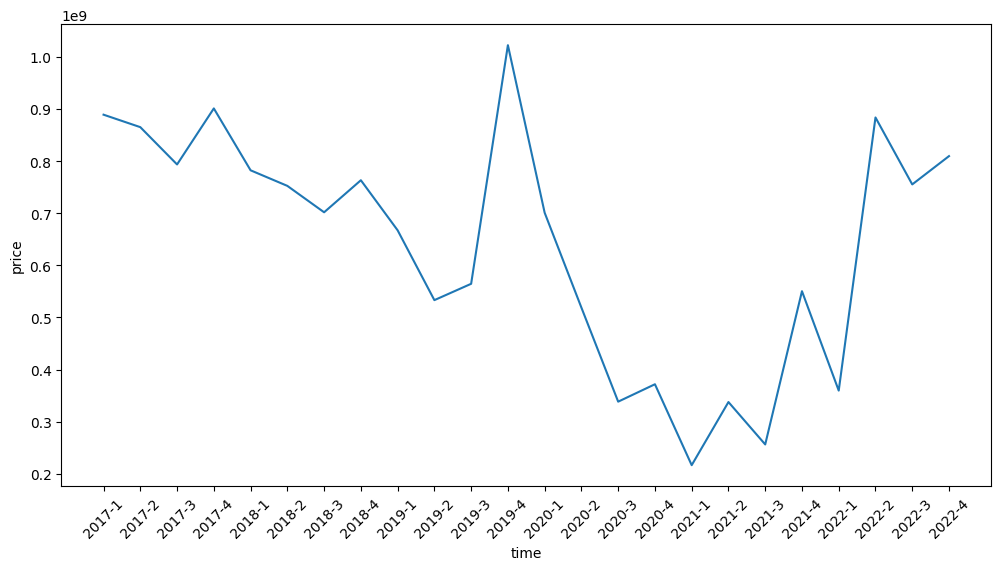

In [242]:
### seaborn lineplot을 이용, 전체 매출 시각화

# 시각화에 필요한 matplotlib.pyplot, seaborn 라이브러리 임폴트
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화
plt.figure(figsize=(12, 6))
sns.lineplot(x=sin_sing['분기'], y=sin_sing['분기당_매출_금액'])
plt.xlabel('time')
plt.xticks(rotation=45)
plt.ylabel('price')
plt.show()

## 23년 1분기 매출 예측

In [243]:
### X / y 데이터 생성
X = sin_sing[['성장성', '시장성', '순점포증감률']]
y = sin_sing.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000 -3.897018e+06  1.219512
1   0.973082 -4.034759e+06 -6.493506
2   0.917286 -4.486818e+06  2.531646
3   1.135457 -3.911423e+06  2.469136
4   0.868253 -3.569379e+06 -3.846154
5   0.961804 -4.321981e+06 -1.298701
6   0.932678 -3.509037e+06 -5.479452
7   1.087609 -4.957442e+06 -1.388889
8   0.874206 -2.147959e+06 -5.882353
9   0.799178 -3.033560e+06 -1.492537
10  1.058763 -4.011341e+06  0.000000
11  1.810830 -1.409424e+06  1.470588
12  0.685579 -2.343003e+06  1.470588
13  0.740243 -1.598553e+06  0.000000
14  0.652363 -1.950135e+06 -6.153846
15  1.098653 -1.885917e+06 -3.225806
16  0.582532 -1.893771e+06 -3.508772
17  1.559105 -1.787072e+06 -3.636364
18  0.759160 -7.284218e+05 -1.851852
19  2.146555 -2.371126e+06 -3.846154
20  0.653562 -4.278213e+05  0.000000
21  2.456695 -1.207353e+06  0.000000
22  0.854665 -2.176164e+06 -4.000000
23  1.071872 -2.549139e+06  1.960784
---------------------------------------------------------------------------

In [244]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [245]:
### 시계열 분석에 적합한 데이터를 만들어 주는 함수 정의
def make_dataset(X, y, window_size=10):
    X_data = []
    y_data = []
    for start in np.arange(len(X) - window_size):
        stop = start + window_size
        X_data.append(X[start:stop, :])
        y_data.append(y[stop])
    return np.array(X_data), np.array(y_data)




### 시계열 분석에서 마지막 테스트 데이터를 만들어 주는 함수 정의
def make_last_dataset(X, window_size=10):
    X_data_last = []
    for start in np.arange(len(X) - window_size +1):
        stop = start + window_size
        X_data_last.append(X[start:stop, :])
    return X_data_last[-1]

In [246]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [247]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.1452024  0.61402009 0.27628415]
 [0.26109782 0.53167884 0.93674774]]


In [248]:
# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (17, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (17, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (17, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (17, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [249]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_34 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_35 (LSTM)              (None, 32)                12416     
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [250]:
### 모델 학습

# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.4870
Epoch 1: val_loss improved from inf to 0.09285, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.4870 - val_loss: 0.0928
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.4733
Epoch 2: val_loss improved from 0.09285 to 0.08691, saving model to stock_model.h5
1/1 [==============================] - 0s 88ms/step - loss: 0.4733 - val_loss: 0.0869
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.4598
Epoch 3: val_loss improved from 0.08691 to 0.08124, saving model to stock_model.h5
1/1 [==============================] - 0s 93ms/step - loss: 0.4598 - val_loss: 0.0812
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.4465
Epoch 4: val_loss improved from 0.08124 to 0.07584, saving model to stock_model.h5
1/1 [==============================] - 0s 91ms/step - loss: 0.4465 - val_loss: 0.0758
Epoch 5/100
1/1 [=================

In [251]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 1s/step
[[0.21582028]
 [0.22296515]
 [0.2330748 ]
 [0.2725674 ]
 [0.26026535]]


In [252]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_sing.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2021-4,0.414214,0.215820
2022-1,0.177575,0.222965
2022-2,0.827881,0.233075
2022-3,0.668487,0.272567
2022-4,0.735855,0.260265


In [253]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_sing.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 sin_sing의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2021-4,0.414214,0.215820,550292619,390461984.0,159830635.0
2022-1,0.177575,0.222965,359650606,396218048.0,-36567442.0
2022-2,0.827881,0.233075,883551858,404362624.0,479189234.0
2022-3,0.668487,0.272567,755140460,436178720.0,318961740.0
2022-4,0.735855,0.260265,809413562,426267904.0,383145658.0


### 결과

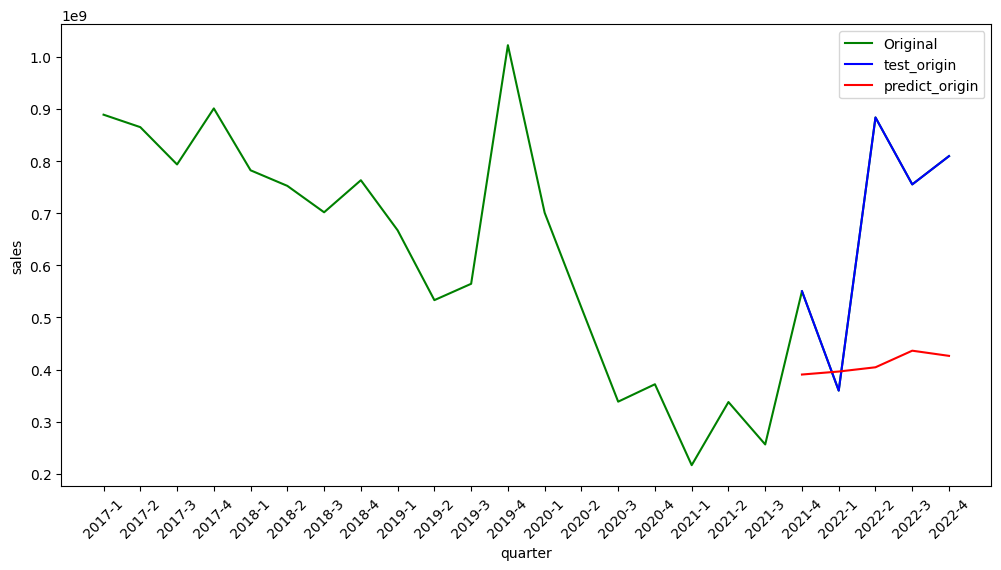

In [254]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_sing['분기'], sin_sing['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [255]:
### error의 요약 통계량
error.describe()

count    5.000000e+00
mean     2.609120e+08
std      2.028961e+08
min     -3.656744e+07
25%      1.598306e+08
50%      3.189617e+08
75%      3.831457e+08
max      4.791892e+08
dtype: float64

In [256]:
### 23년 1분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 34ms/step
[[0.21938422]]
--------------------------------------------------------------------------------
예측된 매출  : 393333184.0 


## 23년 1분기 성장성 예측

In [257]:
# 성장을 예측하기 위한 지표로는 성장성, 안정성, 시장성, 순점포증감률 선정. => 안정성 제외!

### X / y 데이터 생성
X = sin_sing[['분기당_매출_금액', '시장성', '순점포증감률']]
y = sin_sing.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

     분기당_매출_금액           시장성    순점포증감률
0    888886775 -3.897018e+06  1.219512
1    864959956 -4.034759e+06 -6.493506
2    793415694 -4.486818e+06  2.531646
3    900889049 -3.911423e+06  2.469136
4    782199749 -3.569379e+06 -3.846154
5    752322539 -4.321981e+06 -1.298701
6    701674773 -3.509037e+06 -5.479452
7    763147474 -4.957442e+06 -1.388889
8    667147867 -2.147959e+06 -5.882353
9    533169762 -3.033560e+06 -1.492537
10   564500541 -4.011341e+06  0.000000
11  1022214656 -1.409424e+06  1.470588
12   700808812 -2.343003e+06  1.470588
13   518768654 -1.598553e+06  0.000000
14   338425418 -1.950135e+06 -6.153846
15   371812264 -1.885917e+06 -3.225806
16   216592367 -1.893771e+06 -3.508772
17   337690234 -1.787072e+06 -3.636364
18   256360839 -7.284218e+05 -1.851852
19   550292619 -2.371126e+06 -3.846154
20   359650606 -4.278213e+05  0.000000
21   883551858 -1.207353e+06  0.000000
22   755140460 -2.176164e+06 -4.000000
23   809413562 -2.549139e+06  1.960784
-------------------------

In [258]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [259]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [260]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.66848708 0.61402009 0.27628415]
 [0.73585501 0.53167884 0.93674774]]


In [261]:
# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (17, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (17, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (17, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (17, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [262]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_36 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_37 (LSTM)              (None, 32)                12416     
                                                                 
 dense_18 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [263]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.0929
Epoch 1: val_loss improved from inf to 0.05993, saving model to stock_model.h5
1/1 [==============================] - 7s 7s/step - loss: 0.0929 - val_loss: 0.0599
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.0868
Epoch 2: val_loss improved from 0.05993 to 0.05625, saving model to stock_model.h5
1/1 [==============================] - 0s 93ms/step - loss: 0.0868 - val_loss: 0.0563
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.0810
Epoch 3: val_loss improved from 0.05625 to 0.05289, saving model to stock_model.h5
1/1 [==============================] - 0s 89ms/step - loss: 0.0810 - val_loss: 0.0529
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.0756
Epoch 4: val_loss improved from 0.05289 to 0.04983, saving model to stock_model.h5
1/1 [==============================] - 0s 92ms/step - loss: 0.0756 - val_loss: 0.0498
Epoch 5/100
1/1 [=================

In [264]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 803ms/step
[[0.10735541]
 [0.11465213]
 [0.12503795]
 [0.1488645 ]
 [0.16006525]]


In [265]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_sing.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2021-4,0.834518,0.107355
2022-1,0.037900,0.114652
2022-2,1.000000,0.125038
2022-3,0.145202,0.148864
2022-4,0.261098,0.160065


In [266]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_sing.iloc[-len(pred):, 3].values       # 성장성이 sin_sing의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2021-4,0.834518,0.107355,2.146555,0.783733,1.362822
2022-1,0.037900,0.114652,0.653562,0.797408,-0.143846
2022-2,1.000000,0.125038,2.456695,0.816873,1.639822
2022-3,0.145202,0.148864,0.854665,0.861528,-0.006863
2022-4,0.261098,0.160065,1.071872,0.882520,0.189352


### 결과

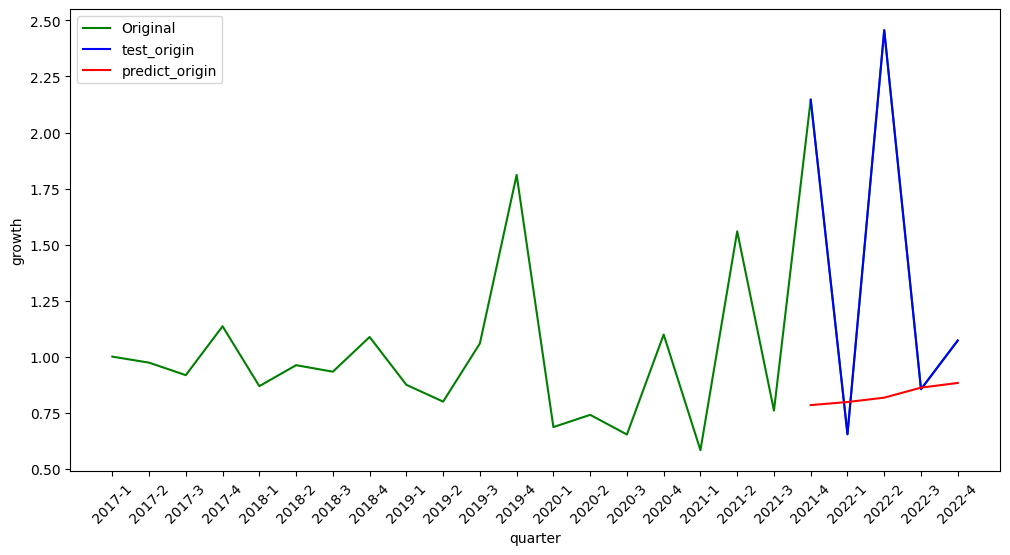

In [267]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_sing['분기'], sin_sing['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [268]:
## error의 요약 통계량
error.describe()

count    5.000000
mean     0.608257
std      0.829610
min     -0.143846
25%     -0.006863
50%      0.189352
75%      1.362822
max      1.639822
dtype: float64

In [269]:
### 23년 1분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 41ms/step
[[0.15310723]]
--------------------------------------------------------------------------------
예측된 성장성  : 0.8694795370101929 


## 23년 1분기 시장성 예측

In [270]:
# 시장성을 예측하기 위한 지표로는 성장성, 안정성, 총매출, 순점포증감률 선정. => 안정성 제외!

### X / y 데이터 생성
X = sin_sing[['성장성', '분기당_매출_금액', '순점포증감률']]
y = sin_sing.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성   분기당_매출_금액    순점포증감률
0   1.000000   888886775  1.219512
1   0.973082   864959956 -6.493506
2   0.917286   793415694  2.531646
3   1.135457   900889049  2.469136
4   0.868253   782199749 -3.846154
5   0.961804   752322539 -1.298701
6   0.932678   701674773 -5.479452
7   1.087609   763147474 -1.388889
8   0.874206   667147867 -5.882353
9   0.799178   533169762 -1.492537
10  1.058763   564500541  0.000000
11  1.810830  1022214656  1.470588
12  0.685579   700808812  1.470588
13  0.740243   518768654  0.000000
14  0.652363   338425418 -6.153846
15  1.098653   371812264 -3.225806
16  0.582532   216592367 -3.508772
17  1.559105   337690234 -3.636364
18  0.759160   256360839 -1.851852
19  2.146555   550292619 -3.846154
20  0.653562   359650606  0.000000
21  2.456695   883551858  0.000000
22  0.854665   755140460 -4.000000
23  1.071872   809413562  1.960784
--------------------------------------------------------------------------------
             시장성
0  -3.897018e+06
1  -4.0347

In [271]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [272]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [273]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.1452024  0.66848708 0.27628415]
 [0.26109782 0.73585501 0.93674774]]


In [274]:
# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (17, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (17, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (17, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (17, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [275]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_38 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_39 (LSTM)              (None, 32)                12416     
                                                                 
 dense_19 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [276]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.1707
Epoch 1: val_loss improved from inf to 0.53000, saving model to stock_model.h5
1/1 [==============================] - 8s 8s/step - loss: 0.1707 - val_loss: 0.5300
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.1627
Epoch 2: val_loss improved from 0.53000 to 0.51541, saving model to stock_model.h5
1/1 [==============================] - 0s 98ms/step - loss: 0.1627 - val_loss: 0.5154
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.1550
Epoch 3: val_loss improved from 0.51541 to 0.50121, saving model to stock_model.h5
1/1 [==============================] - 0s 93ms/step - loss: 0.1550 - val_loss: 0.5012
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.1478
Epoch 4: val_loss improved from 0.50121 to 0.48729, saving model to stock_model.h5
1/1 [==============================] - 0s 86ms/step - loss: 0.1478 - val_loss: 0.4873
Epoch 5/100
1/1 [=================

In [277]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 799ms/step
[[0.26674262]
 [0.28041455]
 [0.31535295]
 [0.36114734]
 [0.40039596]]


In [278]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_sing.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2021-4,0.570978,0.266743
2022-1,1.000000,0.280415
2022-2,0.827903,0.315353
2022-3,0.614020,0.361147
2022-4,0.531679,0.400396


In [279]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_sing.iloc[-len(pred):, 5].values       # 시장성이 sin_sing의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2021-4,0.570978,0.266743,-2.371126e+06,-3749199.00,1.378073e+06
2022-1,1.000000,0.280415,-4.278213e+05,-3687270.25,3.259449e+06
2022-2,0.827903,0.315353,-1.207353e+06,-3529012.75,2.321659e+06
2022-3,0.614020,0.361147,-2.176164e+06,-3321581.50,1.145418e+06
2022-4,0.531679,0.400396,-2.549139e+06,-3143800.00,5.946615e+05


### 결과

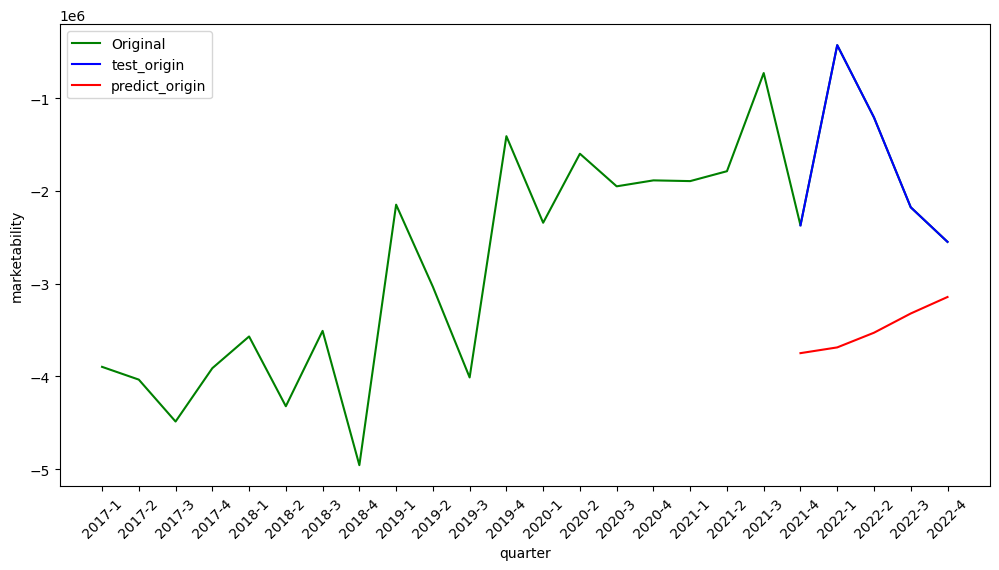

In [280]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_sing['분기'], sin_sing['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [281]:
### error의 요약 통계량
error.describe()

count    5.000000e+00
mean     1.739852e+06
std      1.053965e+06
min      5.946615e+05
25%      1.145418e+06
50%      1.378073e+06
75%      2.321659e+06
max      3.259449e+06
dtype: float64

In [282]:
### 23년 1분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 35ms/step
[[0.35790843]]
--------------------------------------------------------------------------------
예측된 시장성  : -3336252.5 


## 23년 1분기 순점포증감률 예측

In [283]:
# 순점포증감률을 예측하기 위한 지표로는 성장성, 안정성, 총매출, 시장성 선정. => 안정성 제외!

### X / y 데이터 생성
X = sin_sing[['성장성', '분기당_매출_금액', '시장성']]
y = sin_sing.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성   분기당_매출_금액           시장성
0   1.000000   888886775 -3.897018e+06
1   0.973082   864959956 -4.034759e+06
2   0.917286   793415694 -4.486818e+06
3   1.135457   900889049 -3.911423e+06
4   0.868253   782199749 -3.569379e+06
5   0.961804   752322539 -4.321981e+06
6   0.932678   701674773 -3.509037e+06
7   1.087609   763147474 -4.957442e+06
8   0.874206   667147867 -2.147959e+06
9   0.799178   533169762 -3.033560e+06
10  1.058763   564500541 -4.011341e+06
11  1.810830  1022214656 -1.409424e+06
12  0.685579   700808812 -2.343003e+06
13  0.740243   518768654 -1.598553e+06
14  0.652363   338425418 -1.950135e+06
15  1.098653   371812264 -1.885917e+06
16  0.582532   216592367 -1.893771e+06
17  1.559105   337690234 -1.787072e+06
18  0.759160   256360839 -7.284218e+05
19  2.146555   550292619 -2.371126e+06
20  0.653562   359650606 -4.278213e+05
21  2.456695   883551858 -1.207353e+06
22  0.854665   755140460 -2.176164e+06
23  1.071872   809413562 -2.549139e+06
-------------------------

In [284]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [285]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [286]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.1452024  0.66848708 0.61402009]
 [0.26109782 0.73585501 0.53167884]]


In [287]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (17, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (17, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (17, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (17, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [288]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_40 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_41 (LSTM)              (None, 32)                12416     
                                                                 
 dense_20 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [289]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.4714
Epoch 1: val_loss improved from inf to 0.28579, saving model to stock_model.h5
1/1 [==============================] - 7s 7s/step - loss: 0.4714 - val_loss: 0.2858
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.4580
Epoch 2: val_loss improved from 0.28579 to 0.27603, saving model to stock_model.h5
1/1 [==============================] - 0s 85ms/step - loss: 0.4580 - val_loss: 0.2760
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.4450
Epoch 3: val_loss improved from 0.27603 to 0.26657, saving model to stock_model.h5
1/1 [==============================] - 0s 110ms/step - loss: 0.4450 - val_loss: 0.2666
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.4324
Epoch 4: val_loss improved from 0.26657 to 0.25741, saving model to stock_model.h5
1/1 [==============================] - 0s 86ms/step - loss: 0.4324 - val_loss: 0.2574
Epoch 5/100
1/1 [================

In [290]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 797ms/step
[[0.41448367]
 [0.43100792]
 [0.48345333]
 [0.52139086]
 [0.63636065]]


In [291]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_sing.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2021-4,0.293331,0.414484
2022-1,0.719490,0.431008
2022-2,0.719490,0.483453
2022-3,0.276284,0.521391
2022-4,0.936748,0.636361


In [292]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_sing.iloc[-len(pred):, 4].values       # 순점포증감률이 sin_sing의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2021-4,0.293331,0.414484,-3.846154,-2.752728,-1.093425
2022-1,0.719490,0.431008,0.000000,-2.603595,2.603595
2022-2,0.719490,0.483453,0.000000,-2.130267,2.130267
2022-3,0.276284,0.521391,-4.000000,-1.787875,-2.212125
2022-4,0.936748,0.636361,1.960784,-0.750255,2.711039


### 결과

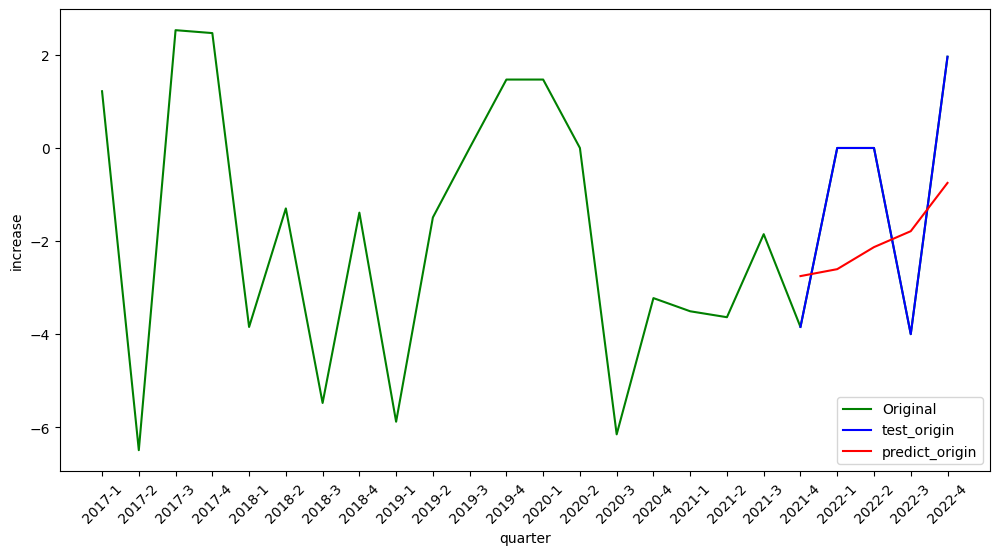

In [293]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_sing['분기'], sin_sing['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [294]:
### error의 요약 통계량
error.describe()

count    5.000000
mean     0.827870
std      2.309151
min     -2.212125
25%     -1.093425
50%      2.130267
75%      2.603595
max      2.711039
dtype: float64

In [295]:
### 23년 1분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 25ms/step
[[0.53598326]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : -1.656175971031189 


## 원본 데이터에 예측값 추가하기

In [296]:
print(sales)
print(growth)
print(marketability)
print(increase)

393333200.0
0.86947954
-3336252.5
-1.656176


In [297]:
sin_sing.loc[24] = ['2023-1', '노래방', sales, growth, increase, marketability]

<ipython-input-297-cf482370bc03>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sin_sing.loc[24] = ['2023-1', '노래방', sales, growth, increase, marketability]


In [298]:
sin_sing

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,노래방,8.888868e+08,1.000000,1.219512,-3.897018e+06
1,2017-2,노래방,8.649600e+08,0.973082,-6.493506,-4.034759e+06
2,2017-3,노래방,7.934157e+08,0.917286,2.531646,-4.486818e+06
3,2017-4,노래방,9.008890e+08,1.135457,2.469136,-3.911423e+06
4,2018-1,노래방,7.821997e+08,0.868253,-3.846154,-3.569379e+06
5,2018-2,노래방,7.523225e+08,0.961804,-1.298701,-4.321981e+06
6,2018-3,노래방,7.016748e+08,0.932678,-5.479452,-3.509037e+06
7,2018-4,노래방,7.631475e+08,1.087609,-1.388889,-4.957442e+06
8,2019-1,노래방,6.671479e+08,0.874206,-5.882353,-2.147959e+06
9,2019-2,노래방,5.331698e+08,0.799178,-1.492537,-3.033560e+06


## 23년 2분기 매출, 성장성, 시장성, 순점포증감률 예측 및 원본 데이터에 추가

### 매출

In [299]:
################ 매출 ####################

# 총 매출액을 예측하기 위한 지표로는 성장성, 시장성, 순점포증감률 선정.

### X / y 데이터 생성
X = sin_sing[['성장성', '시장성', '순점포증감률']]
y = sin_sing.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000 -3.897018e+06  1.219512
1   0.973082 -4.034759e+06 -6.493506
2   0.917286 -4.486818e+06  2.531646
3   1.135457 -3.911423e+06  2.469136
4   0.868253 -3.569379e+06 -3.846154
5   0.961804 -4.321981e+06 -1.298701
6   0.932678 -3.509037e+06 -5.479452
7   1.087609 -4.957442e+06 -1.388889
8   0.874206 -2.147959e+06 -5.882353
9   0.799178 -3.033560e+06 -1.492537
10  1.058763 -4.011341e+06  0.000000
11  1.810830 -1.409424e+06  1.470588
12  0.685579 -2.343003e+06  1.470588
13  0.740243 -1.598553e+06  0.000000
14  0.652363 -1.950135e+06 -6.153846
15  1.098653 -1.885917e+06 -3.225806
16  0.582532 -1.893771e+06 -3.508772
17  1.559105 -1.787072e+06 -3.636364
18  0.759160 -7.284218e+05 -1.851852
19  2.146555 -2.371126e+06 -3.846154
20  0.653562 -4.278213e+05  0.000000
21  2.456695 -1.207353e+06  0.000000
22  0.854665 -2.176164e+06 -4.000000
23  1.071872 -2.549139e+06  1.960784
24  0.869480 -3.336252e+06 -1.656176
--------------------------------------

In [300]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [301]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.26109782 0.53167884 0.93674774]
 [0.15310724 0.35790845 0.53598327]]


In [302]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [303]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_42 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_43 (LSTM)              (None, 32)                12416     
                                                                 
 dense_21 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [304]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.4870
Epoch 1: val_loss improved from inf to 0.10555, saving model to stock_model.h5
1/1 [==============================] - 6s 6s/step - loss: 0.4870 - val_loss: 0.1055
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.4733
Epoch 2: val_loss improved from 0.10555 to 0.09910, saving model to stock_model.h5
1/1 [==============================] - 0s 92ms/step - loss: 0.4733 - val_loss: 0.0991
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.4598
Epoch 3: val_loss improved from 0.09910 to 0.09294, saving model to stock_model.h5
1/1 [==============================] - 0s 86ms/step - loss: 0.4598 - val_loss: 0.0929
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.4465
Epoch 4: val_loss improved from 0.09294 to 0.08703, saving model to stock_model.h5
1/1 [==============================] - 0s 86ms/step - loss: 0.4465 - val_loss: 0.0870
Epoch 5/100
1/1 [=================

In [305]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 814ms/step
[[0.2633907 ]
 [0.2749904 ]
 [0.3222667 ]
 [0.30809814]
 [0.25678477]]


In [306]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_sing.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.177575,0.263391
2022-2,0.827881,0.274990
2022-3,0.668487,0.322267
2022-4,0.735855,0.308098
2023-1,0.219384,0.256785


In [307]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_sing.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 sin_sing의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.177575,0.263391,359650606.0,428785792.0,-69135186.0
2022-2,0.827881,0.274990,883551858.0,438130784.0,445421074.0
2022-3,0.668487,0.322267,755140460.0,476217568.0,278922892.0
2022-4,0.735855,0.308098,809413562.0,464803072.0,344610490.0
2023-1,0.219384,0.256785,393333184.0,423463904.0,-30130720.0


In [308]:
df_test = df_test.reset_index()

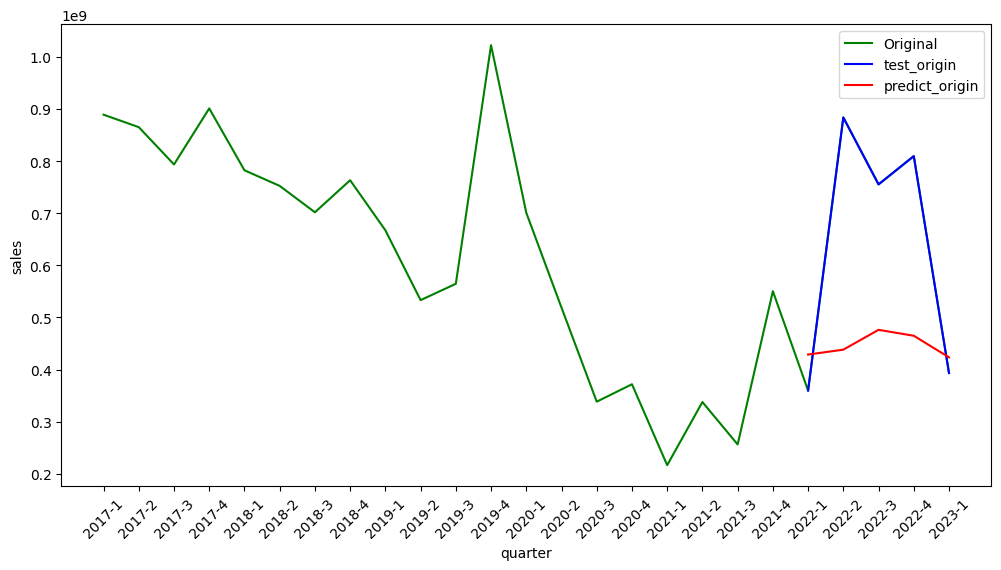

In [309]:
### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_sing['분기'], sin_sing['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [310]:
### error의 요약 통계량
error.describe()

count    5.000000e+00
mean     1.939377e+08
std      2.305334e+08
min     -6.913519e+07
25%     -3.013072e+07
50%      2.789229e+08
75%      3.446105e+08
max      4.454211e+08
dtype: float64

In [311]:
### 23년 2분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 24ms/step
[[0.3058497]]
--------------------------------------------------------------------------------
예측된 매출  : 462991712.0 


### 성장성

In [312]:
### X / y 데이터 생성
X = sin_sing[['분기당_매출_금액', '시장성', '순점포증감률']]
y = sin_sing.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액           시장성    순점포증감률
0   8.888868e+08 -3.897018e+06  1.219512
1   8.649600e+08 -4.034759e+06 -6.493506
2   7.934157e+08 -4.486818e+06  2.531646
3   9.008890e+08 -3.911423e+06  2.469136
4   7.821997e+08 -3.569379e+06 -3.846154
5   7.523225e+08 -4.321981e+06 -1.298701
6   7.016748e+08 -3.509037e+06 -5.479452
7   7.631475e+08 -4.957442e+06 -1.388889
8   6.671479e+08 -2.147959e+06 -5.882353
9   5.331698e+08 -3.033560e+06 -1.492537
10  5.645005e+08 -4.011341e+06  0.000000
11  1.022215e+09 -1.409424e+06  1.470588
12  7.008088e+08 -2.343003e+06  1.470588
13  5.187687e+08 -1.598553e+06  0.000000
14  3.384254e+08 -1.950135e+06 -6.153846
15  3.718123e+08 -1.885917e+06 -3.225806
16  2.165924e+08 -1.893771e+06 -3.508772
17  3.376902e+08 -1.787072e+06 -3.636364
18  2.563608e+08 -7.284218e+05 -1.851852
19  5.502926e+08 -2.371126e+06 -3.846154
20  3.596506e+08 -4.278213e+05  0.000000
21  8.835519e+08 -1.207353e+06  0.000000
22  7.551405e+08 -2.176164e+06 -4.000000
23  8.094136e+08

In [313]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [314]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.73585501 0.53167884 0.93674774]
 [0.21938422 0.35790845 0.53598327]]


In [315]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [316]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_44 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_45 (LSTM)              (None, 32)                12416     
                                                                 
 dense_22 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [317]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.0929
Epoch 1: val_loss improved from inf to 0.14513, saving model to stock_model.h5
1/1 [==============================] - 7s 7s/step - loss: 0.0929 - val_loss: 0.1451
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.0868
Epoch 2: val_loss improved from 0.14513 to 0.13974, saving model to stock_model.h5
1/1 [==============================] - 0s 93ms/step - loss: 0.0868 - val_loss: 0.1397
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.0810
Epoch 3: val_loss improved from 0.13974 to 0.13467, saving model to stock_model.h5
1/1 [==============================] - 0s 87ms/step - loss: 0.0810 - val_loss: 0.1347
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.0756
Epoch 4: val_loss improved from 0.13467 to 0.12989, saving model to stock_model.h5
1/1 [==============================] - 0s 84ms/step - loss: 0.0756 - val_loss: 0.1299
Epoch 5/100
1/1 [=================

In [318]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 818ms/step
[[0.188187  ]
 [0.20262963]
 [0.24458504]
 [0.25818112]
 [0.24261245]]


In [319]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_sing.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.037900,0.188187
2022-2,1.000000,0.202630
2022-3,0.145202,0.244585
2022-4,0.261098,0.258181
2023-1,0.153107,0.242612


In [320]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_sing.iloc[-len(pred):, 3].values       # 성장성이 sin_sing의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.037900,0.188187,0.653562,0.935225,-0.281662
2022-2,1.000000,0.202630,2.456695,0.962293,1.494402
2022-3,0.145202,0.244585,0.854665,1.040924,-0.186259
2022-4,0.261098,0.258181,1.071872,1.066405,0.005466
2023-1,0.153107,0.242612,0.869480,1.037227,-0.167747


In [321]:
df_test = df_test.reset_index()

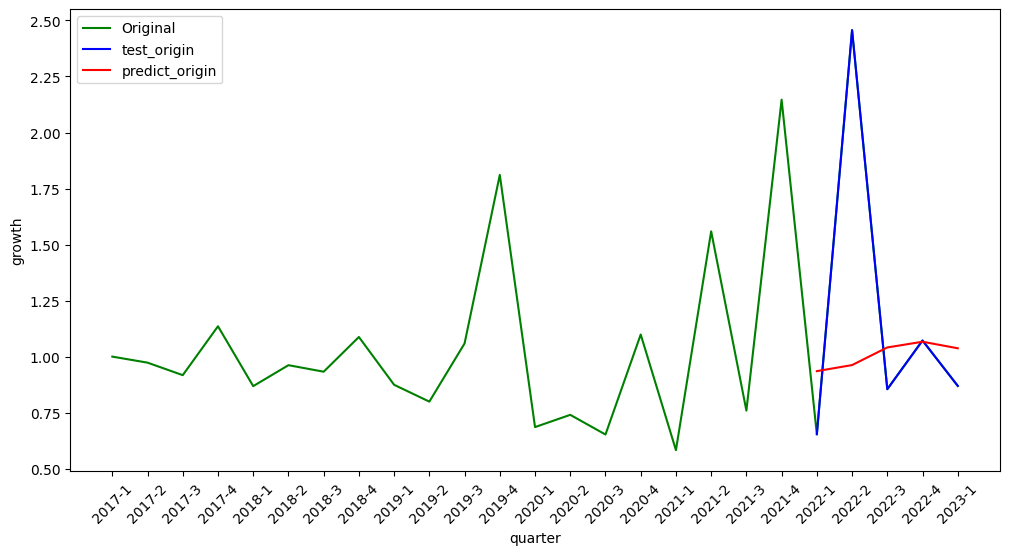

In [322]:
### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_sing['분기'], sin_sing['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [323]:
### error의 요약 통계량
error.describe()

count    5.000000
mean     0.172840
std      0.746000
min     -0.281662
25%     -0.186259
50%     -0.167747
75%      0.005466
max      1.494402
dtype: float64

In [324]:
### 23년 2분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 24ms/step
[[0.25461167]]
--------------------------------------------------------------------------------
예측된 성장성  : 1.0597153902053833 


### 시장성

In [325]:
### X / y 데이터 생성
X = sin_sing[['분기당_매출_금액', '성장성', '순점포증감률']]
y = sin_sing.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성    순점포증감률
0   8.888868e+08  1.000000  1.219512
1   8.649600e+08  0.973082 -6.493506
2   7.934157e+08  0.917286  2.531646
3   9.008890e+08  1.135457  2.469136
4   7.821997e+08  0.868253 -3.846154
5   7.523225e+08  0.961804 -1.298701
6   7.016748e+08  0.932678 -5.479452
7   7.631475e+08  1.087609 -1.388889
8   6.671479e+08  0.874206 -5.882353
9   5.331698e+08  0.799178 -1.492537
10  5.645005e+08  1.058763  0.000000
11  1.022215e+09  1.810830  1.470588
12  7.008088e+08  0.685579  1.470588
13  5.187687e+08  0.740243  0.000000
14  3.384254e+08  0.652363 -6.153846
15  3.718123e+08  1.098653 -3.225806
16  2.165924e+08  0.582532 -3.508772
17  3.376902e+08  1.559105 -3.636364
18  2.563608e+08  0.759160 -1.851852
19  5.502926e+08  2.146555 -3.846154
20  3.596506e+08  0.653562  0.000000
21  8.835519e+08  2.456695  0.000000
22  7.551405e+08  0.854665 -4.000000
23  8.094136e+08  1.071872  1.960784
24  3.933332e+08  0.869480 -1.656176
--------------------------------------

In [326]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [327]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.73585501 0.26109782 0.93674774]
 [0.21938422 0.15310724 0.53598327]]


In [328]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [329]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_46 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_47 (LSTM)              (None, 32)                12416     
                                                                 
 dense_23 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [330]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.1615
Epoch 1: val_loss improved from inf to 0.49992, saving model to stock_model.h5
1/1 [==============================] - 6s 6s/step - loss: 0.1615 - val_loss: 0.4999
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.1540
Epoch 2: val_loss improved from 0.49992 to 0.48605, saving model to stock_model.h5
1/1 [==============================] - 0s 118ms/step - loss: 0.1540 - val_loss: 0.4861
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.1470
Epoch 3: val_loss improved from 0.48605 to 0.47249, saving model to stock_model.h5
1/1 [==============================] - 0s 122ms/step - loss: 0.1470 - val_loss: 0.4725
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.1402
Epoch 4: val_loss improved from 0.47249 to 0.45919, saving model to stock_model.h5
1/1 [==============================] - 0s 133ms/step - loss: 0.1402 - val_loss: 0.4592
Epoch 5/100
1/1 [==============

In [331]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 805ms/step
[[0.27080446]
 [0.30604377]
 [0.35425687]
 [0.39620838]
 [0.36115825]]


In [332]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_sing.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,1.000000,0.270804
2022-2,0.827903,0.306044
2022-3,0.614020,0.354257
2022-4,0.531679,0.396208
2023-1,0.357908,0.361158


In [333]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_sing.iloc[-len(pred):, 5].values       # 시장성이 sin_sing의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,1.000000,0.270804,-4.278213e+05,-3730800.50,3.302979e+06
2022-2,0.827903,0.306044,-1.207353e+06,-3571179.75,2.363826e+06
2022-3,0.614020,0.354257,-2.176164e+06,-3352792.75,1.176629e+06
2022-4,0.531679,0.396208,-2.549139e+06,-3162768.25,6.136297e+05
2023-1,0.357908,0.361158,-3.336252e+06,-3321532.25,-1.472025e+04


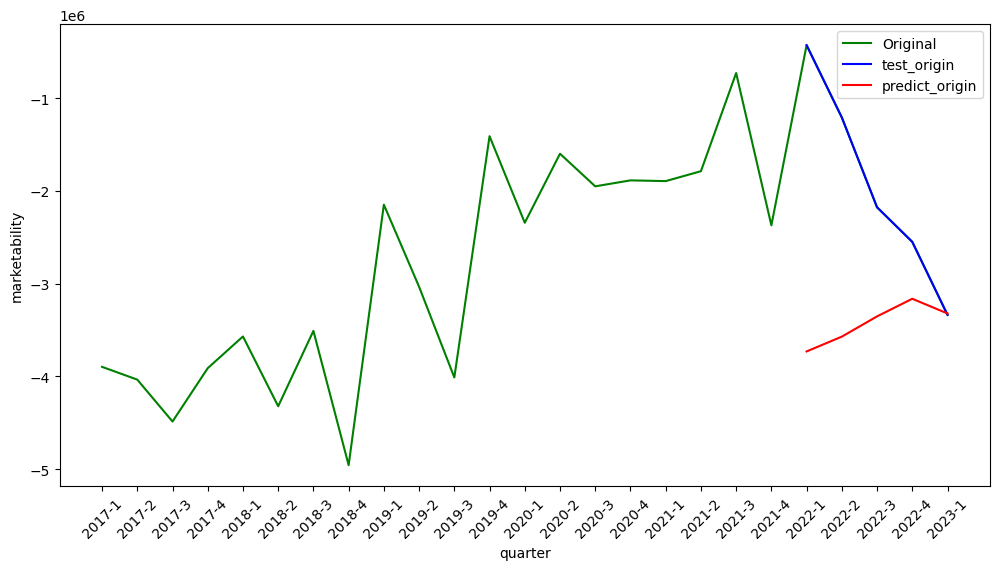

In [334]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_sing['분기'], sin_sing['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [335]:
### error의 요약 통계량
error.describe()

count    5.000000e+00
mean     1.488469e+06
std      1.339857e+06
min     -1.472025e+04
25%      6.136297e+05
50%      1.176629e+06
75%      2.363826e+06
max      3.302979e+06
dtype: float64

In [336]:
### 23년 2분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 26ms/step
[[0.3853878]]
--------------------------------------------------------------------------------
예측된 시장성  : -3211781.25 


### 순점포증감률

In [337]:
### X / y 데이터 생성
X = sin_sing[['분기당_매출_금액', '성장성', '시장성']]
y = sin_sing.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성           시장성
0   8.888868e+08  1.000000 -3.897018e+06
1   8.649600e+08  0.973082 -4.034759e+06
2   7.934157e+08  0.917286 -4.486818e+06
3   9.008890e+08  1.135457 -3.911423e+06
4   7.821997e+08  0.868253 -3.569379e+06
5   7.523225e+08  0.961804 -4.321981e+06
6   7.016748e+08  0.932678 -3.509037e+06
7   7.631475e+08  1.087609 -4.957442e+06
8   6.671479e+08  0.874206 -2.147959e+06
9   5.331698e+08  0.799178 -3.033560e+06
10  5.645005e+08  1.058763 -4.011341e+06
11  1.022215e+09  1.810830 -1.409424e+06
12  7.008088e+08  0.685579 -2.343003e+06
13  5.187687e+08  0.740243 -1.598553e+06
14  3.384254e+08  0.652363 -1.950135e+06
15  3.718123e+08  1.098653 -1.885917e+06
16  2.165924e+08  0.582532 -1.893771e+06
17  3.376902e+08  1.559105 -1.787072e+06
18  2.563608e+08  0.759160 -7.284218e+05
19  5.502926e+08  2.146555 -2.371126e+06
20  3.596506e+08  0.653562 -4.278213e+05
21  8.835519e+08  2.456695 -1.207353e+06
22  7.551405e+08  0.854665 -2.176164e+06
23  8.094136e+08

In [338]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [339]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.73585501 0.26109782 0.53167884]
 [0.21938422 0.15310724 0.35790845]]


In [340]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [341]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_48 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_49 (LSTM)              (None, 32)                12416     
                                                                 
 dense_24 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [342]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.4530
Epoch 1: val_loss improved from inf to 0.25755, saving model to stock_model.h5
1/1 [==============================] - 7s 7s/step - loss: 0.4530 - val_loss: 0.2575
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.4401
Epoch 2: val_loss improved from 0.25755 to 0.24862, saving model to stock_model.h5
1/1 [==============================] - 0s 85ms/step - loss: 0.4401 - val_loss: 0.2486
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.4275
Epoch 3: val_loss improved from 0.24862 to 0.23993, saving model to stock_model.h5
1/1 [==============================] - 0s 82ms/step - loss: 0.4275 - val_loss: 0.2399
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.4152
Epoch 4: val_loss improved from 0.23993 to 0.23145, saving model to stock_model.h5
1/1 [==============================] - 0s 94ms/step - loss: 0.4152 - val_loss: 0.2315
Epoch 5/100
1/1 [=================

In [343]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 821ms/step
[[0.395863  ]
 [0.4496045 ]
 [0.48969188]
 [0.610629  ]
 [0.5289551 ]]


In [344]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_sing.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.719490,0.395863
2022-2,0.719490,0.449605
2022-3,0.276284,0.489692
2022-4,0.936748,0.610629
2023-1,0.535983,0.528955


In [345]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_sing.iloc[-len(pred):, 4].values       # 순점포증감률이 sin_sing의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.719490,0.395863,0.000000,-2.920783,2.920783
2022-2,0.719490,0.449605,0.000000,-2.435757,2.435757
2022-3,0.276284,0.489692,-4.000000,-2.073963,-1.926037
2022-4,0.936748,0.610629,1.960784,-0.982487,2.943271
2023-1,0.535983,0.528955,-1.656176,-1.719606,0.063430


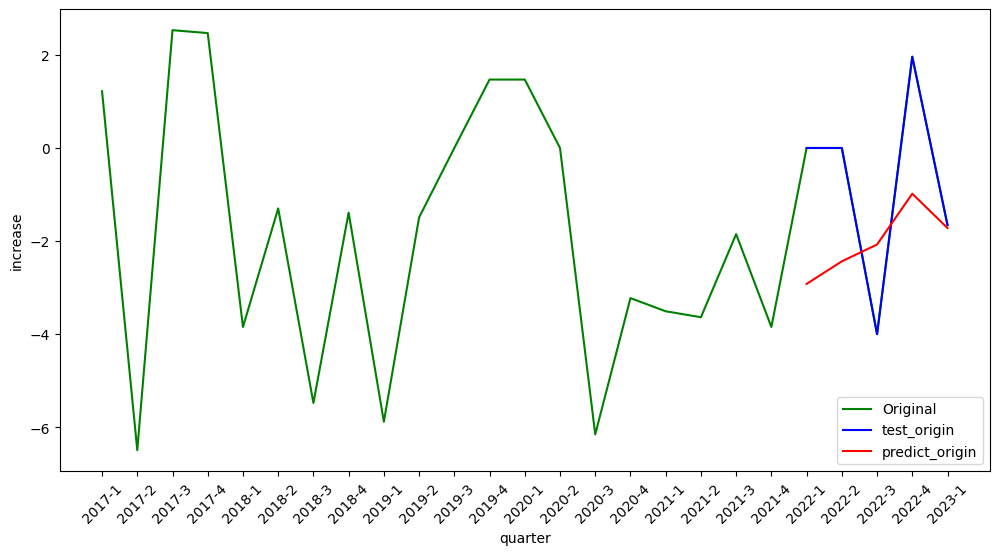

In [346]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_sing['분기'], sin_sing['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [347]:
### error의 요약 통계량
error.describe()

count    5.000000
mean     1.287441
std      2.153651
min     -1.926037
25%      0.063430
50%      2.435757
75%      2.920783
max      2.943271
dtype: float64

In [348]:
### 23년 2분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 29ms/step
[[0.4721399]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : -2.2323720455169678 


### 추가


In [349]:
sin_sing.loc[25] = ['2023-2', '노래방', sales, growth, increase, marketability]

<ipython-input-349-83c0e1a7e73c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sin_sing.loc[25] = ['2023-2', '노래방', sales, growth, increase, marketability]


In [350]:
sin_sing

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,노래방,8.888868e+08,1.000000,1.219512,-3.897018e+06
1,2017-2,노래방,8.649600e+08,0.973082,-6.493506,-4.034759e+06
2,2017-3,노래방,7.934157e+08,0.917286,2.531646,-4.486818e+06
3,2017-4,노래방,9.008890e+08,1.135457,2.469136,-3.911423e+06
4,2018-1,노래방,7.821997e+08,0.868253,-3.846154,-3.569379e+06
5,2018-2,노래방,7.523225e+08,0.961804,-1.298701,-4.321981e+06
6,2018-3,노래방,7.016748e+08,0.932678,-5.479452,-3.509037e+06
7,2018-4,노래방,7.631475e+08,1.087609,-1.388889,-4.957442e+06
8,2019-1,노래방,6.671479e+08,0.874206,-5.882353,-2.147959e+06
9,2019-2,노래방,5.331698e+08,0.799178,-1.492537,-3.033560e+06


## 23년 3분기 매출, 성장성, 시장성, 순점포증감률 예측 및 원본 데이터에 추가

### 매출

In [351]:
################ 매출 ####################

### X / y 데이터 생성
X = sin_sing[['성장성', '시장성', '순점포증감률']]
y = sin_sing.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000 -3.897018e+06  1.219512
1   0.973082 -4.034759e+06 -6.493506
2   0.917286 -4.486818e+06  2.531646
3   1.135457 -3.911423e+06  2.469136
4   0.868253 -3.569379e+06 -3.846154
5   0.961804 -4.321981e+06 -1.298701
6   0.932678 -3.509037e+06 -5.479452
7   1.087609 -4.957442e+06 -1.388889
8   0.874206 -2.147959e+06 -5.882353
9   0.799178 -3.033560e+06 -1.492537
10  1.058763 -4.011341e+06  0.000000
11  1.810830 -1.409424e+06  1.470588
12  0.685579 -2.343003e+06  1.470588
13  0.740243 -1.598553e+06  0.000000
14  0.652363 -1.950135e+06 -6.153846
15  1.098653 -1.885917e+06 -3.225806
16  0.582532 -1.893771e+06 -3.508772
17  1.559105 -1.787072e+06 -3.636364
18  0.759160 -7.284218e+05 -1.851852
19  2.146555 -2.371126e+06 -3.846154
20  0.653562 -4.278213e+05  0.000000
21  2.456695 -1.207353e+06  0.000000
22  0.854665 -2.176164e+06 -4.000000
23  1.071872 -2.549139e+06  1.960784
24  0.869480 -3.336252e+06 -1.656176
25  1.059715 -3.211781e+06 -2.232372
-

In [352]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [353]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.15310724 0.35790845 0.53598327]
 [0.25461165 0.38538785 0.47213991]]


In [354]:
# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [355]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_50 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_51 (LSTM)              (None, 32)                12416     
                                                                 
 dense_25 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [356]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.4787
Epoch 1: val_loss improved from inf to 0.06339, saving model to stock_model.h5
1/1 [==============================] - 6s 6s/step - loss: 0.4787 - val_loss: 0.0634
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.4647
Epoch 2: val_loss improved from 0.06339 to 0.05836, saving model to stock_model.h5
1/1 [==============================] - 0s 96ms/step - loss: 0.4647 - val_loss: 0.0584
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.4510
Epoch 3: val_loss improved from 0.05836 to 0.05360, saving model to stock_model.h5
1/1 [==============================] - 0s 87ms/step - loss: 0.4510 - val_loss: 0.0536
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.4375
Epoch 4: val_loss improved from 0.05360 to 0.04910, saving model to stock_model.h5
1/1 [==============================] - 0s 100ms/step - loss: 0.4375 - val_loss: 0.0491
Epoch 5/100
1/1 [================

In [357]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 784ms/step
[[0.2133921 ]
 [0.24905254]
 [0.23799928]
 [0.20141004]
 [0.23965819]]


In [358]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_sing.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.827881,0.213392
2022-3,0.668487,0.249053
2022-4,0.735855,0.237999
2023-1,0.219384,0.201410
2023-2,0.305850,0.239658


In [359]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_sing.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 sin_sing의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.827881,0.213392,883551858.0,388505792.0,495046066.0
2022-3,0.668487,0.249053,755140460.0,417234656.0,337905804.0
2022-4,0.735855,0.237999,809413562.0,408329888.0,401083674.0
2023-1,0.219384,0.201410,393333184.0,378852768.0,14480416.0
2023-2,0.305850,0.239658,462991712.0,409666368.0,53325344.0


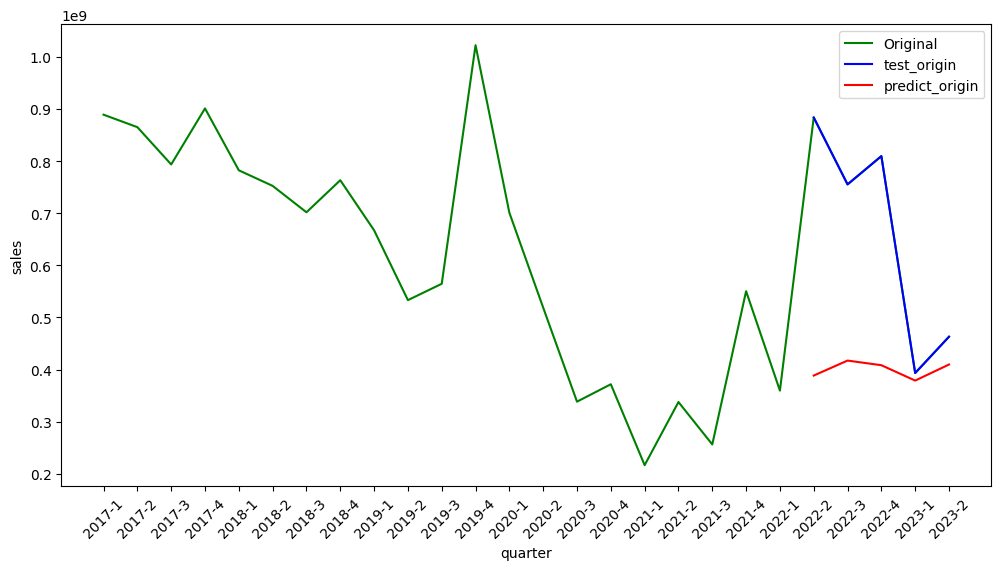

In [360]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_sing['분기'], sin_sing['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [361]:
### error의 요약 통계량
error.describe()

count    5.000000e+00
mean     2.603683e+08
std      2.146009e+08
min      1.448042e+07
25%      5.332534e+07
50%      3.379058e+08
75%      4.010837e+08
max      4.950461e+08
dtype: float64

In [362]:
### 23년 3분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 22ms/step
[[0.19540149]]
--------------------------------------------------------------------------------
예측된 매출  : 374012160.0 


### 성장성

In [363]:
X = sin_sing[['분기당_매출_금액', '시장성', '순점포증감률']]
y = sin_sing.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액           시장성    순점포증감률
0   8.888868e+08 -3.897018e+06  1.219512
1   8.649600e+08 -4.034759e+06 -6.493506
2   7.934157e+08 -4.486818e+06  2.531646
3   9.008890e+08 -3.911423e+06  2.469136
4   7.821997e+08 -3.569379e+06 -3.846154
5   7.523225e+08 -4.321981e+06 -1.298701
6   7.016748e+08 -3.509037e+06 -5.479452
7   7.631475e+08 -4.957442e+06 -1.388889
8   6.671479e+08 -2.147959e+06 -5.882353
9   5.331698e+08 -3.033560e+06 -1.492537
10  5.645005e+08 -4.011341e+06  0.000000
11  1.022215e+09 -1.409424e+06  1.470588
12  7.008088e+08 -2.343003e+06  1.470588
13  5.187687e+08 -1.598553e+06  0.000000
14  3.384254e+08 -1.950135e+06 -6.153846
15  3.718123e+08 -1.885917e+06 -3.225806
16  2.165924e+08 -1.893771e+06 -3.508772
17  3.376902e+08 -1.787072e+06 -3.636364
18  2.563608e+08 -7.284218e+05 -1.851852
19  5.502926e+08 -2.371126e+06 -3.846154
20  3.596506e+08 -4.278213e+05  0.000000
21  8.835519e+08 -1.207353e+06  0.000000
22  7.551405e+08 -2.176164e+06 -4.000000
23  8.094136e+08

In [364]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [365]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.21938422 0.35790845 0.53598327]
 [0.30584971 0.38538785 0.47213991]]


In [366]:
# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [367]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_52 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_53 (LSTM)              (None, 32)                12416     
                                                                 
 dense_26 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [368]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.0851
Epoch 1: val_loss improved from inf to 0.14503, saving model to stock_model.h5
1/1 [==============================] - 7s 7s/step - loss: 0.0851 - val_loss: 0.1450
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.0793
Epoch 2: val_loss improved from 0.14503 to 0.13968, saving model to stock_model.h5
1/1 [==============================] - 0s 97ms/step - loss: 0.0793 - val_loss: 0.1397
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.0739
Epoch 3: val_loss improved from 0.13968 to 0.13464, saving model to stock_model.h5
1/1 [==============================] - 0s 88ms/step - loss: 0.0739 - val_loss: 0.1346
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.0689
Epoch 4: val_loss improved from 0.13464 to 0.12987, saving model to stock_model.h5
1/1 [==============================] - 0s 90ms/step - loss: 0.0689 - val_loss: 0.1299
Epoch 5/100
1/1 [=================

In [369]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 812ms/step
[[0.21722946]
 [0.26210198]
 [0.2757756 ]
 [0.25870016]
 [0.27100152]]


In [370]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_sing.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,1.000000,0.217229
2022-3,0.145202,0.262102
2022-4,0.261098,0.275776
2023-1,0.153107,0.258700
2023-2,0.254612,0.271002


In [371]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_sing.iloc[-len(pred):, 3].values       # 성장성이 sin_sing의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,1.000000,0.217229,2.456695,0.989655,1.467040
2022-3,0.145202,0.262102,0.854665,1.073753,-0.219089
2022-4,0.261098,0.275776,1.071872,1.099380,-0.027509
2023-1,0.153107,0.258700,0.869480,1.067378,-0.197898
2023-2,0.254612,0.271002,1.059715,1.090433,-0.030717


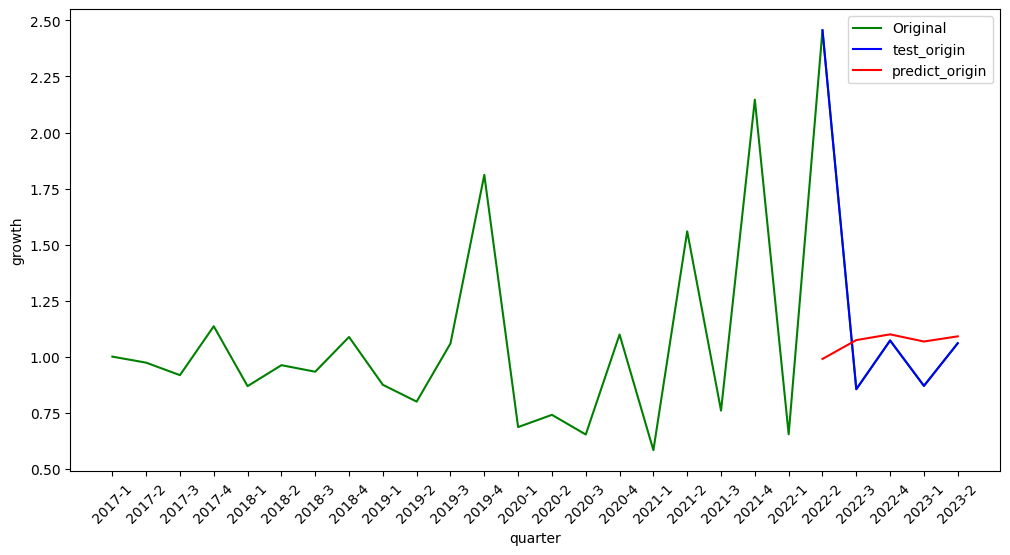

In [372]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_sing['분기'], sin_sing['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [373]:
### error의 요약 통계량
error.describe()

count    5.000000
mean     0.198365
std      0.714900
min     -0.219089
25%     -0.197898
50%     -0.030717
75%     -0.027509
max      1.467040
dtype: float64

In [374]:
### 23년 3분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 23ms/step
[[0.20572007]]
--------------------------------------------------------------------------------
예측된 성장성  : 0.9680845141410828 


### 시장성

In [375]:
### X / y 데이터 생성
X = sin_sing[['분기당_매출_금액', '성장성', '순점포증감률']]
y = sin_sing.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성    순점포증감률
0   8.888868e+08  1.000000  1.219512
1   8.649600e+08  0.973082 -6.493506
2   7.934157e+08  0.917286  2.531646
3   9.008890e+08  1.135457  2.469136
4   7.821997e+08  0.868253 -3.846154
5   7.523225e+08  0.961804 -1.298701
6   7.016748e+08  0.932678 -5.479452
7   7.631475e+08  1.087609 -1.388889
8   6.671479e+08  0.874206 -5.882353
9   5.331698e+08  0.799178 -1.492537
10  5.645005e+08  1.058763  0.000000
11  1.022215e+09  1.810830  1.470588
12  7.008088e+08  0.685579  1.470588
13  5.187687e+08  0.740243  0.000000
14  3.384254e+08  0.652363 -6.153846
15  3.718123e+08  1.098653 -3.225806
16  2.165924e+08  0.582532 -3.508772
17  3.376902e+08  1.559105 -3.636364
18  2.563608e+08  0.759160 -1.851852
19  5.502926e+08  2.146555 -3.846154
20  3.596506e+08  0.653562  0.000000
21  8.835519e+08  2.456695  0.000000
22  7.551405e+08  0.854665 -4.000000
23  8.094136e+08  1.071872  1.960784
24  3.933332e+08  0.869480 -1.656176
25  4.629917e+08  1.059715 -2.232372
-

In [376]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [377]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.21938422 0.15310724 0.53598327]
 [0.30584971 0.25461165 0.47213991]]


In [378]:
# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [379]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_54 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_55 (LSTM)              (None, 32)                12416     
                                                                 
 dense_27 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [380]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.1801
Epoch 1: val_loss improved from inf to 0.58413, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.1801 - val_loss: 0.5841
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.1719
Epoch 2: val_loss improved from 0.58413 to 0.56972, saving model to stock_model.h5
1/1 [==============================] - 0s 139ms/step - loss: 0.1719 - val_loss: 0.5697
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.1640
Epoch 3: val_loss improved from 0.56972 to 0.55556, saving model to stock_model.h5
1/1 [==============================] - 0s 111ms/step - loss: 0.1640 - val_loss: 0.5556
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.1565
Epoch 4: val_loss improved from 0.55556 to 0.54159, saving model to stock_model.h5
1/1 [==============================] - 0s 106ms/step - loss: 0.1565 - val_loss: 0.5416
Epoch 5/100
1/1 [==============

In [381]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 775ms/step
[[0.34016252]
 [0.3954422 ]
 [0.4385819 ]
 [0.38625348]
 [0.42402917]]


In [382]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_sing.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.827903,0.340163
2022-3,0.614020,0.395442
2022-4,0.531679,0.438582
2023-1,0.357908,0.386253
2023-2,0.385388,0.424029


In [383]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_sing.iloc[-len(pred):, 5].values       # 시장성이 sin_sing의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.827903,0.340163,-1.207353e+06,-3416634.75,2.209281e+06
2022-3,0.614020,0.395442,-2.176164e+06,-3166239.00,9.900751e+05
2022-4,0.531679,0.438582,-2.549139e+06,-2970832.25,4.216937e+05
2023-1,0.357908,0.386253,-3.336252e+06,-3207860.25,-1.283922e+05
2023-2,0.385388,0.424029,-3.211781e+06,-3036750.75,-1.750305e+05


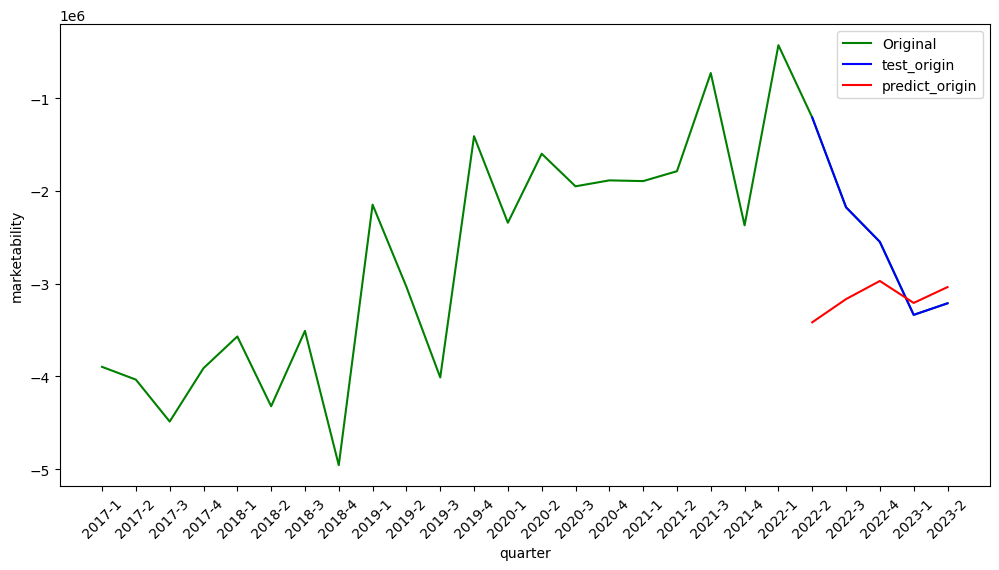

In [384]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_sing['분기'], sin_sing['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [385]:
### error의 요약 통계량
error.describe()

count    5.000000e+00
mean     6.635255e+05
std      9.854933e+05
min     -1.750305e+05
25%     -1.283922e+05
50%      4.216937e+05
75%      9.900751e+05
max      2.209281e+06
dtype: float64

In [386]:
### 23년 3분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 27ms/step
[[0.3184371]]
--------------------------------------------------------------------------------
예측된 시장성  : -3515042.75 


### 순점포증감률

In [387]:
### X / y 데이터 생성
X = sin_sing[['분기당_매출_금액', '성장성', '시장성']]
y = sin_sing.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성           시장성
0   8.888868e+08  1.000000 -3.897018e+06
1   8.649600e+08  0.973082 -4.034759e+06
2   7.934157e+08  0.917286 -4.486818e+06
3   9.008890e+08  1.135457 -3.911423e+06
4   7.821997e+08  0.868253 -3.569379e+06
5   7.523225e+08  0.961804 -4.321981e+06
6   7.016748e+08  0.932678 -3.509037e+06
7   7.631475e+08  1.087609 -4.957442e+06
8   6.671479e+08  0.874206 -2.147959e+06
9   5.331698e+08  0.799178 -3.033560e+06
10  5.645005e+08  1.058763 -4.011341e+06
11  1.022215e+09  1.810830 -1.409424e+06
12  7.008088e+08  0.685579 -2.343003e+06
13  5.187687e+08  0.740243 -1.598553e+06
14  3.384254e+08  0.652363 -1.950135e+06
15  3.718123e+08  1.098653 -1.885917e+06
16  2.165924e+08  0.582532 -1.893771e+06
17  3.376902e+08  1.559105 -1.787072e+06
18  2.563608e+08  0.759160 -7.284218e+05
19  5.502926e+08  2.146555 -2.371126e+06
20  3.596506e+08  0.653562 -4.278213e+05
21  8.835519e+08  2.456695 -1.207353e+06
22  7.551405e+08  0.854665 -2.176164e+06
23  8.094136e+08

In [388]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [389]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.21938422 0.15310724 0.35790845]
 [0.30584971 0.25461165 0.38538785]]


In [390]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [391]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_56 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_57 (LSTM)              (None, 32)                12416     
                                                                 
 dense_28 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [392]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.4867
Epoch 1: val_loss improved from inf to 0.22471, saving model to stock_model.h5
1/1 [==============================] - 6s 6s/step - loss: 0.4867 - val_loss: 0.2247
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.4731
Epoch 2: val_loss improved from 0.22471 to 0.21655, saving model to stock_model.h5
1/1 [==============================] - 0s 90ms/step - loss: 0.4731 - val_loss: 0.2165
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.4598
Epoch 3: val_loss improved from 0.21655 to 0.20865, saving model to stock_model.h5
1/1 [==============================] - 0s 84ms/step - loss: 0.4598 - val_loss: 0.2086
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.4468
Epoch 4: val_loss improved from 0.20865 to 0.20098, saving model to stock_model.h5
1/1 [==============================] - 0s 98ms/step - loss: 0.4468 - val_loss: 0.2010
Epoch 5/100
1/1 [=================

In [393]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 1s/step
[[0.455492  ]
 [0.49538103]
 [0.6160841 ]
 [0.530717  ]
 [0.47409502]]


In [394]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_sing.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.719490,0.455492
2022-3,0.276284,0.495381
2022-4,0.936748,0.616084
2023-1,0.535983,0.530717
2023-2,0.472140,0.474095


In [395]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_sing.iloc[-len(pred):, 4].values       # 순점포증감률이 sin_sing의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.719490,0.455492,0.000000,-2.382622,2.382622
2022-3,0.276284,0.495381,-4.000000,-2.022617,-1.977383
2022-4,0.936748,0.616084,1.960784,-0.933254,2.894038
2023-1,0.535983,0.530717,-1.656176,-1.703705,0.047529
2023-2,0.472140,0.474095,-2.232372,-2.214727,-0.017645


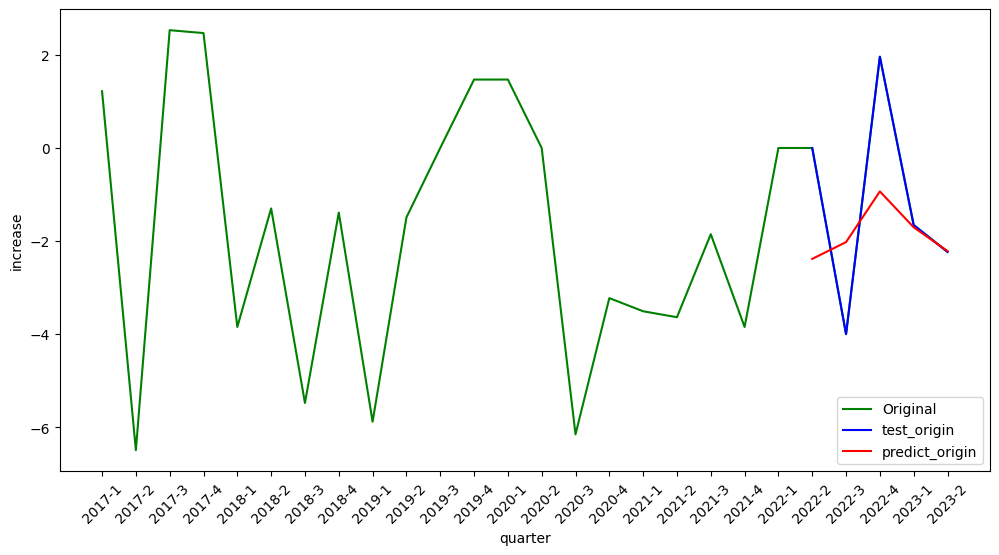

In [396]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_sing['분기'], sin_sing['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [397]:
### error의 요약 통계량
error.describe()

count    5.000000
mean     0.665832
std      1.984206
min     -1.977383
25%     -0.017645
50%      0.047529
75%      2.382622
max      2.894038
dtype: float64

In [398]:
### 23년 3분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 24ms/step
[[0.35360843]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : -3.3021366596221924 


### 추가

In [399]:
sin_sing.loc[26] = ['2023-3', '노래방', sales, growth, increase, marketability]

<ipython-input-399-0482e8b88821>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sin_sing.loc[26] = ['2023-3', '노래방', sales, growth, increase, marketability]


In [400]:
sin_sing

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,노래방,8.888868e+08,1.000000,1.219512,-3.897018e+06
1,2017-2,노래방,8.649600e+08,0.973082,-6.493506,-4.034759e+06
2,2017-3,노래방,7.934157e+08,0.917286,2.531646,-4.486818e+06
3,2017-4,노래방,9.008890e+08,1.135457,2.469136,-3.911423e+06
4,2018-1,노래방,7.821997e+08,0.868253,-3.846154,-3.569379e+06
5,2018-2,노래방,7.523225e+08,0.961804,-1.298701,-4.321981e+06
6,2018-3,노래방,7.016748e+08,0.932678,-5.479452,-3.509037e+06
7,2018-4,노래방,7.631475e+08,1.087609,-1.388889,-4.957442e+06
8,2019-1,노래방,6.671479e+08,0.874206,-5.882353,-2.147959e+06
9,2019-2,노래방,5.331698e+08,0.799178,-1.492537,-3.033560e+06


## 23년 4분기 매출, 성장성, 시장성, 순점포증감률 예측 및 원본데이터에 추가

### 매출

In [401]:
### X / y 데이터 생성
X = sin_sing[['성장성', '시장성', '순점포증감률']]
y = sin_sing.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000 -3.897018e+06  1.219512
1   0.973082 -4.034759e+06 -6.493506
2   0.917286 -4.486818e+06  2.531646
3   1.135457 -3.911423e+06  2.469136
4   0.868253 -3.569379e+06 -3.846154
5   0.961804 -4.321981e+06 -1.298701
6   0.932678 -3.509037e+06 -5.479452
7   1.087609 -4.957442e+06 -1.388889
8   0.874206 -2.147959e+06 -5.882353
9   0.799178 -3.033560e+06 -1.492537
10  1.058763 -4.011341e+06  0.000000
11  1.810830 -1.409424e+06  1.470588
12  0.685579 -2.343003e+06  1.470588
13  0.740243 -1.598553e+06  0.000000
14  0.652363 -1.950135e+06 -6.153846
15  1.098653 -1.885917e+06 -3.225806
16  0.582532 -1.893771e+06 -3.508772
17  1.559105 -1.787072e+06 -3.636364
18  0.759160 -7.284218e+05 -1.851852
19  2.146555 -2.371126e+06 -3.846154
20  0.653562 -4.278213e+05  0.000000
21  2.456695 -1.207353e+06  0.000000
22  0.854665 -2.176164e+06 -4.000000
23  1.071872 -2.549139e+06  1.960784
24  0.869480 -3.336252e+06 -1.656176
25  1.059715 -3.211781e+06 -2.232372
2

In [402]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [403]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.25461165 0.38538785 0.47213991]
 [0.20572004 0.3184371  0.35360843]]


In [404]:
# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [405]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_58 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_59 (LSTM)              (None, 32)                12416     
                                                                 
 dense_29 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [406]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.4530
Epoch 1: val_loss improved from inf to 0.13448, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.4530 - val_loss: 0.1345
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.4392
Epoch 2: val_loss improved from 0.13448 to 0.12829, saving model to stock_model.h5
1/1 [==============================] - 0s 87ms/step - loss: 0.4392 - val_loss: 0.1283
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.4257
Epoch 3: val_loss improved from 0.12829 to 0.12238, saving model to stock_model.h5
1/1 [==============================] - 0s 79ms/step - loss: 0.4257 - val_loss: 0.1224
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.4124
Epoch 4: val_loss improved from 0.12238 to 0.11672, saving model to stock_model.h5
1/1 [==============================] - 0s 82ms/step - loss: 0.4124 - val_loss: 0.1167
Epoch 5/100
1/1 [=================

In [407]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 1s/step
[[0.34601092]
 [0.3314662 ]
 [0.27431375]
 [0.32678717]
 [0.26438576]]


In [408]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_sing.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.668487,0.346011
2022-4,0.735855,0.331466
2023-1,0.219384,0.274314
2023-2,0.305850,0.326787
2023-3,0.195401,0.264386


In [409]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_sing.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 sin_sing의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.668487,0.346011,755140460.0,495346464.0,259793996.0
2022-4,0.735855,0.331466,809413562.0,483628896.0,325784666.0
2023-1,0.219384,0.274314,393333184.0,437585600.0,-44252416.0
2023-2,0.305850,0.326787,462991712.0,479859360.0,-16867648.0
2023-3,0.195401,0.264386,374012160.0,429587392.0,-55575232.0


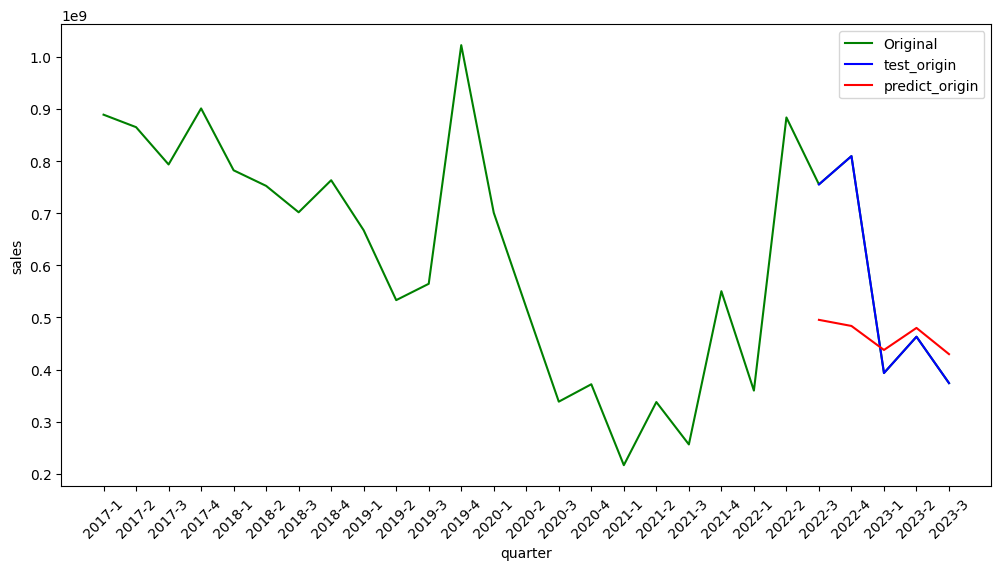

In [410]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_sing['분기'], sin_sing['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [411]:
### error의 요약 통계량
error.describe()

count    5.000000e+00
mean     9.377667e+07
std      1.837047e+08
min     -5.557523e+07
25%     -4.425242e+07
50%     -1.686765e+07
75%      2.597940e+08
max      3.257847e+08
dtype: float64

In [412]:
### 23년 4분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 33ms/step
[[0.25203076]]
--------------------------------------------------------------------------------
예측된 매출  : 419633952.0 


### 성장성

In [413]:
X = sin_sing[['분기당_매출_금액', '시장성', '순점포증감률']]
y = sin_sing.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액           시장성    순점포증감률
0   8.888868e+08 -3.897018e+06  1.219512
1   8.649600e+08 -4.034759e+06 -6.493506
2   7.934157e+08 -4.486818e+06  2.531646
3   9.008890e+08 -3.911423e+06  2.469136
4   7.821997e+08 -3.569379e+06 -3.846154
5   7.523225e+08 -4.321981e+06 -1.298701
6   7.016748e+08 -3.509037e+06 -5.479452
7   7.631475e+08 -4.957442e+06 -1.388889
8   6.671479e+08 -2.147959e+06 -5.882353
9   5.331698e+08 -3.033560e+06 -1.492537
10  5.645005e+08 -4.011341e+06  0.000000
11  1.022215e+09 -1.409424e+06  1.470588
12  7.008088e+08 -2.343003e+06  1.470588
13  5.187687e+08 -1.598553e+06  0.000000
14  3.384254e+08 -1.950135e+06 -6.153846
15  3.718123e+08 -1.885917e+06 -3.225806
16  2.165924e+08 -1.893771e+06 -3.508772
17  3.376902e+08 -1.787072e+06 -3.636364
18  2.563608e+08 -7.284218e+05 -1.851852
19  5.502926e+08 -2.371126e+06 -3.846154
20  3.596506e+08 -4.278213e+05  0.000000
21  8.835519e+08 -1.207353e+06  0.000000
22  7.551405e+08 -2.176164e+06 -4.000000
23  8.094136e+08

In [414]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [415]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.30584971 0.38538785 0.47213991]
 [0.19540149 0.3184371  0.35360843]]


In [416]:
# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [417]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_60 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_61 (LSTM)              (None, 32)                12416     
                                                                 
 dense_30 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [418]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.0793
Epoch 1: val_loss improved from inf to 0.27480, saving model to stock_model.h5
1/1 [==============================] - 6s 6s/step - loss: 0.0793 - val_loss: 0.2748
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.0737
Epoch 2: val_loss improved from 0.27480 to 0.26686, saving model to stock_model.h5
1/1 [==============================] - 0s 95ms/step - loss: 0.0737 - val_loss: 0.2669
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.0685
Epoch 3: val_loss improved from 0.26686 to 0.25923, saving model to stock_model.h5
1/1 [==============================] - 0s 96ms/step - loss: 0.0685 - val_loss: 0.2592
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.0636
Epoch 4: val_loss improved from 0.25923 to 0.25189, saving model to stock_model.h5
1/1 [==============================] - 0s 97ms/step - loss: 0.0636 - val_loss: 0.2519
Epoch 5/100
1/1 [=================

In [419]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 1s/step
[[0.25673985]
 [0.27008793]
 [0.25490254]
 [0.26505157]
 [0.20452304]]


In [420]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_sing.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.145202,0.256740
2022-4,0.261098,0.270088
2023-1,0.153107,0.254903
2023-2,0.254612,0.265052
2023-3,0.205720,0.204523


In [421]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_sing.iloc[-len(pred):, 3].values       # 성장성이 sin_sing의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.145202,0.256740,0.854665,1.063704,-0.209039
2022-4,0.261098,0.270088,1.071872,1.088720,-0.016849
2023-1,0.153107,0.254903,0.869480,1.060261,-0.190781
2023-2,0.254612,0.265052,1.059715,1.079282,-0.019566
2023-3,0.205720,0.204523,0.968085,0.965841,0.002243


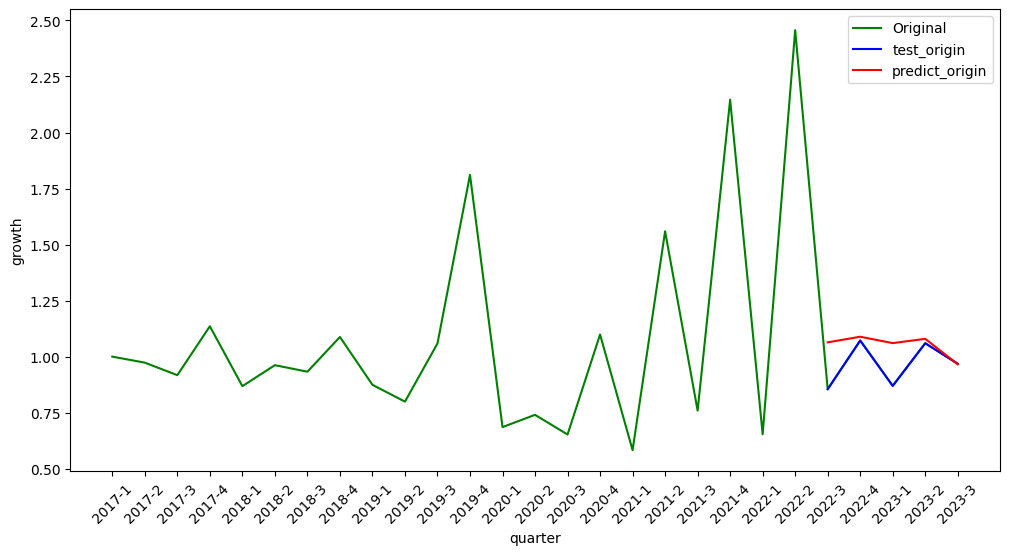

In [422]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_sing['분기'], sin_sing['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [423]:
### error의 요약 통계량
error.describe()

count    5.000000
mean    -0.086798
std      0.103799
min     -0.209039
25%     -0.190781
50%     -0.019566
75%     -0.016849
max      0.002243
dtype: float64

In [424]:
### 23년 4분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 35ms/step
[[0.19740485]]
--------------------------------------------------------------------------------
예측된 성장성  : 0.9525004625320435 


###시장성

In [425]:
### X / y 데이터 생성
X = sin_sing[['분기당_매출_금액', '성장성', '순점포증감률']]
y = sin_sing.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성    순점포증감률
0   8.888868e+08  1.000000  1.219512
1   8.649600e+08  0.973082 -6.493506
2   7.934157e+08  0.917286  2.531646
3   9.008890e+08  1.135457  2.469136
4   7.821997e+08  0.868253 -3.846154
5   7.523225e+08  0.961804 -1.298701
6   7.016748e+08  0.932678 -5.479452
7   7.631475e+08  1.087609 -1.388889
8   6.671479e+08  0.874206 -5.882353
9   5.331698e+08  0.799178 -1.492537
10  5.645005e+08  1.058763  0.000000
11  1.022215e+09  1.810830  1.470588
12  7.008088e+08  0.685579  1.470588
13  5.187687e+08  0.740243  0.000000
14  3.384254e+08  0.652363 -6.153846
15  3.718123e+08  1.098653 -3.225806
16  2.165924e+08  0.582532 -3.508772
17  3.376902e+08  1.559105 -3.636364
18  2.563608e+08  0.759160 -1.851852
19  5.502926e+08  2.146555 -3.846154
20  3.596506e+08  0.653562  0.000000
21  8.835519e+08  2.456695  0.000000
22  7.551405e+08  0.854665 -4.000000
23  8.094136e+08  1.071872  1.960784
24  3.933332e+08  0.869480 -1.656176
25  4.629917e+08  1.059715 -2.232372
2

In [426]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [427]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.30584971 0.25461165 0.47213991]
 [0.19540149 0.20572004 0.35360843]]


In [428]:
# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [429]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_62 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_63 (LSTM)              (None, 32)                12416     
                                                                 
 dense_31 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [430]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.2147
Epoch 1: val_loss improved from inf to 0.60164, saving model to stock_model.h5
1/1 [==============================] - 6s 6s/step - loss: 0.2147 - val_loss: 0.6016
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.2052
Epoch 2: val_loss improved from 0.60164 to 0.58774, saving model to stock_model.h5
1/1 [==============================] - 0s 94ms/step - loss: 0.2052 - val_loss: 0.5877
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.1961
Epoch 3: val_loss improved from 0.58774 to 0.57402, saving model to stock_model.h5
1/1 [==============================] - 0s 89ms/step - loss: 0.1961 - val_loss: 0.5740
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.1874
Epoch 4: val_loss improved from 0.57402 to 0.56046, saving model to stock_model.h5
1/1 [==============================] - 0s 92ms/step - loss: 0.1874 - val_loss: 0.5605
Epoch 5/100
1/1 [=================

In [431]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 792ms/step
[[0.43809402]
 [0.4923118 ]
 [0.42172983]
 [0.46998087]
 [0.34954602]]


In [432]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_sing.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.614020,0.438094
2022-4,0.531679,0.492312
2023-1,0.357908,0.421730
2023-2,0.385388,0.469981
2023-3,0.318437,0.349546


In [433]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_sing.iloc[-len(pred):, 5].values       # 시장성이 sin_sing의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.614020,0.438094,-2.176164e+06,-2973042.25,796878.350000
2022-4,0.531679,0.492312,-2.549139e+06,-2727456.25,178317.717787
2023-1,0.357908,0.421730,-3.336252e+06,-3047165.75,-289086.750000
2023-2,0.385388,0.469981,-3.211781e+06,-2828606.75,-383174.500000
2023-3,0.318437,0.349546,-3.515043e+06,-3374131.25,-140911.500000


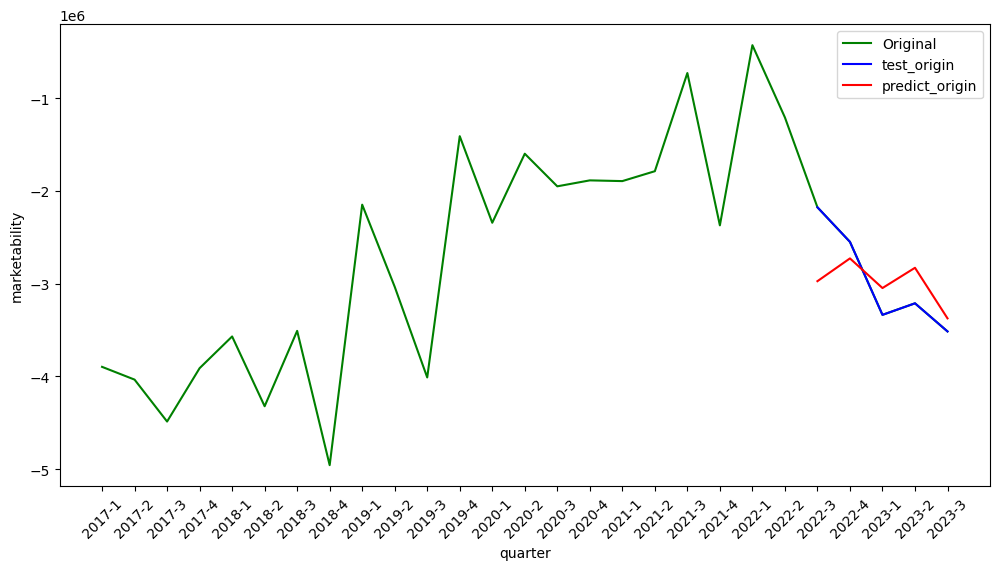

In [434]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_sing['분기'], sin_sing['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [435]:
### error의 요약 통계량
error.describe()

count         5.000000
mean      32404.663557
std      477444.211239
min     -383174.500000
25%     -289086.750000
50%     -140911.500000
75%      178317.717787
max      796878.350000
dtype: float64

In [436]:
### 23년 4분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 23ms/step
[[0.33794048]]
--------------------------------------------------------------------------------
예측된 시장성  : -3426699.75 


### 순점포증감률

In [437]:
### X / y 데이터 생성
X = sin_sing[['분기당_매출_금액', '성장성', '시장성']]
y = sin_sing.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성           시장성
0   8.888868e+08  1.000000 -3.897018e+06
1   8.649600e+08  0.973082 -4.034759e+06
2   7.934157e+08  0.917286 -4.486818e+06
3   9.008890e+08  1.135457 -3.911423e+06
4   7.821997e+08  0.868253 -3.569379e+06
5   7.523225e+08  0.961804 -4.321981e+06
6   7.016748e+08  0.932678 -3.509037e+06
7   7.631475e+08  1.087609 -4.957442e+06
8   6.671479e+08  0.874206 -2.147959e+06
9   5.331698e+08  0.799178 -3.033560e+06
10  5.645005e+08  1.058763 -4.011341e+06
11  1.022215e+09  1.810830 -1.409424e+06
12  7.008088e+08  0.685579 -2.343003e+06
13  5.187687e+08  0.740243 -1.598553e+06
14  3.384254e+08  0.652363 -1.950135e+06
15  3.718123e+08  1.098653 -1.885917e+06
16  2.165924e+08  0.582532 -1.893771e+06
17  3.376902e+08  1.559105 -1.787072e+06
18  2.563608e+08  0.759160 -7.284218e+05
19  5.502926e+08  2.146555 -2.371126e+06
20  3.596506e+08  0.653562 -4.278213e+05
21  8.835519e+08  2.456695 -1.207353e+06
22  7.551405e+08  0.854665 -2.176164e+06
23  8.094136e+08

In [438]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [439]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.30584971 0.25461165 0.38538785]
 [0.19540149 0.20572004 0.3184371 ]]


In [440]:
# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [441]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_64 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_65 (LSTM)              (None, 32)                12416     
                                                                 
 dense_32 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [442]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.4928
Epoch 1: val_loss improved from inf to 0.22529, saving model to stock_model.h5
1/1 [==============================] - 7s 7s/step - loss: 0.4928 - val_loss: 0.2253
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.4786
Epoch 2: val_loss improved from 0.22529 to 0.21760, saving model to stock_model.h5
1/1 [==============================] - 0s 85ms/step - loss: 0.4786 - val_loss: 0.2176
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.4647
Epoch 3: val_loss improved from 0.21760 to 0.21014, saving model to stock_model.h5
1/1 [==============================] - 0s 91ms/step - loss: 0.4647 - val_loss: 0.2101
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.4512
Epoch 4: val_loss improved from 0.21014 to 0.20290, saving model to stock_model.h5
1/1 [==============================] - 0s 96ms/step - loss: 0.4512 - val_loss: 0.2029
Epoch 5/100
1/1 [=================

In [443]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 795ms/step
[[0.49843976]
 [0.61746854]
 [0.5290447 ]
 [0.47276613]
 [0.353525  ]]


In [444]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_sing.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.276284,0.498440
2022-4,0.936748,0.617469
2023-1,0.535983,0.529045
2023-2,0.472140,0.472766
2023-3,0.353608,0.353525


In [445]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_sing.iloc[-len(pred):, 4].values       # 순점포증감률이 sin_sing의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.276284,0.498440,-4.000000,-1.995012,-2.004988
2022-4,0.936748,0.617469,1.960784,-0.920759,2.881543
2023-1,0.535983,0.529045,-1.656176,-1.718798,0.062622
2023-2,0.472140,0.472766,-2.232372,-2.226720,-0.005652
2023-3,0.353608,0.353525,-3.302137,-3.302890,0.000753


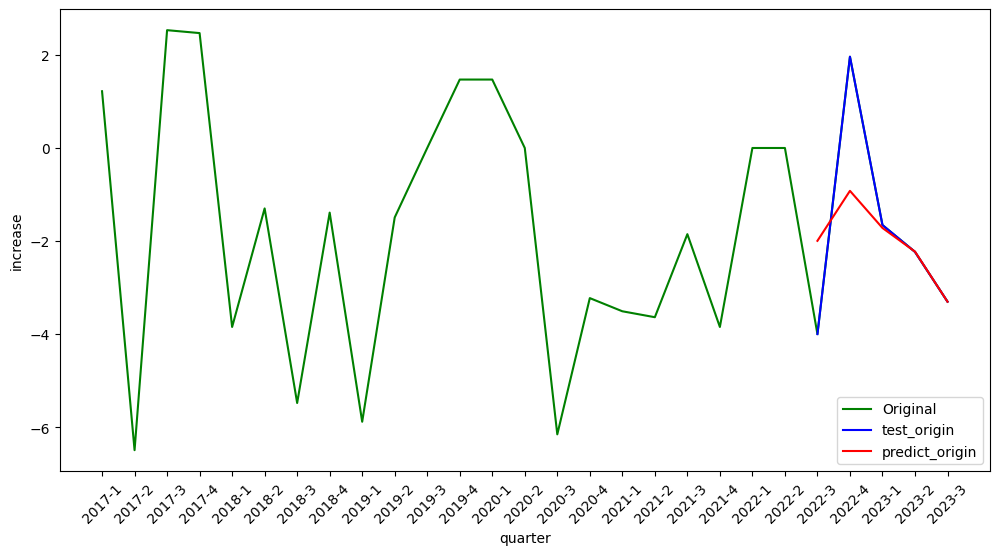

In [446]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_sing['분기'], sin_sing['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [447]:
### error의 요약 통계량
error.describe()

count    5.000000
mean     0.186856
std      1.743032
min     -2.004988
25%     -0.005652
50%      0.000753
75%      0.062622
max      2.881543
dtype: float64

In [448]:
### 23년 2분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 28ms/step
[[0.36246258]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : -3.222226619720459 


### 추가

In [449]:
sin_sing.loc[27] = ['2023-4', '노래방', sales, growth, increase, marketability]

<ipython-input-449-465d468bb745>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sin_sing.loc[27] = ['2023-4', '노래방', sales, growth, increase, marketability]


In [450]:
final_sin_sing = sin_sing
final_sin_sing

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,노래방,8.888868e+08,1.000000,1.219512,-3.897018e+06
1,2017-2,노래방,8.649600e+08,0.973082,-6.493506,-4.034759e+06
2,2017-3,노래방,7.934157e+08,0.917286,2.531646,-4.486818e+06
3,2017-4,노래방,9.008890e+08,1.135457,2.469136,-3.911423e+06
4,2018-1,노래방,7.821997e+08,0.868253,-3.846154,-3.569379e+06
5,2018-2,노래방,7.523225e+08,0.961804,-1.298701,-4.321981e+06
6,2018-3,노래방,7.016748e+08,0.932678,-5.479452,-3.509037e+06
7,2018-4,노래방,7.631475e+08,1.087609,-1.388889,-4.957442e+06
8,2019-1,노래방,6.671479e+08,0.874206,-5.882353,-2.147959e+06
9,2019-2,노래방,5.331698e+08,0.799178,-1.492537,-3.033560e+06


## 최종결과

In [451]:
### X / y 데이터 생성
X = sin_sing[['성장성', '시장성', '순점포증감률']]
y = sin_sing.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000 -3.897018e+06  1.219512
1   0.973082 -4.034759e+06 -6.493506
2   0.917286 -4.486818e+06  2.531646
3   1.135457 -3.911423e+06  2.469136
4   0.868253 -3.569379e+06 -3.846154
5   0.961804 -4.321981e+06 -1.298701
6   0.932678 -3.509037e+06 -5.479452
7   1.087609 -4.957442e+06 -1.388889
8   0.874206 -2.147959e+06 -5.882353
9   0.799178 -3.033560e+06 -1.492537
10  1.058763 -4.011341e+06  0.000000
11  1.810830 -1.409424e+06  1.470588
12  0.685579 -2.343003e+06  1.470588
13  0.740243 -1.598553e+06  0.000000
14  0.652363 -1.950135e+06 -6.153846
15  1.098653 -1.885917e+06 -3.225806
16  0.582532 -1.893771e+06 -3.508772
17  1.559105 -1.787072e+06 -3.636364
18  0.759160 -7.284218e+05 -1.851852
19  2.146555 -2.371126e+06 -3.846154
20  0.653562 -4.278213e+05  0.000000
21  2.456695 -1.207353e+06  0.000000
22  0.854665 -2.176164e+06 -4.000000
23  1.071872 -2.549139e+06  1.960784
24  0.869480 -3.336252e+06 -1.656176
25  1.059715 -3.211781e+06 -2.232372
2

In [452]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (28, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (28, 1)


In [453]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (26, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (26, 1)
[[0.20572004 0.3184371  0.35360843]
 [0.19740483 0.3379405  0.36246258]]


In [454]:
# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [455]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_66 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_67 (LSTM)              (None, 32)                12416     
                                                                 
 dense_33 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [456]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.4530
Epoch 1: val_loss improved from inf to 0.17414, saving model to stock_model.h5
1/1 [==============================] - 6s 6s/step - loss: 0.4530 - val_loss: 0.1741
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.4392
Epoch 2: val_loss improved from 0.17414 to 0.16644, saving model to stock_model.h5
1/1 [==============================] - 0s 90ms/step - loss: 0.4392 - val_loss: 0.1664
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.4257
Epoch 3: val_loss improved from 0.16644 to 0.15903, saving model to stock_model.h5
1/1 [==============================] - 0s 84ms/step - loss: 0.4257 - val_loss: 0.1590
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.4124
Epoch 4: val_loss improved from 0.15903 to 0.15189, saving model to stock_model.h5
1/1 [==============================] - 0s 88ms/step - loss: 0.4124 - val_loss: 0.1519
Epoch 5/100
1/1 [=================

In [457]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 798ms/step
[[0.3869137 ]
 [0.31648317]
 [0.37799862]
 [0.30448517]
 [0.2903956 ]]


In [458]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_sing.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.735855,0.386914
2023-1,0.219384,0.316483
2023-2,0.305850,0.377999
2023-3,0.195401,0.304485
2023-4,0.252031,0.290396


In [459]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_sing.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 sin_sing의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.735855,0.386914,809413562.0,528298656.0,281114906.0
2023-1,0.219384,0.316483,393333184.0,471558272.0,-78225088.0
2023-2,0.305850,0.377999,462991712.0,521116480.0,-58124768.0
2023-3,0.195401,0.304485,374012160.0,461892416.0,-87880256.0
2023-4,0.252031,0.290396,419633952.0,450541536.0,-30907584.0


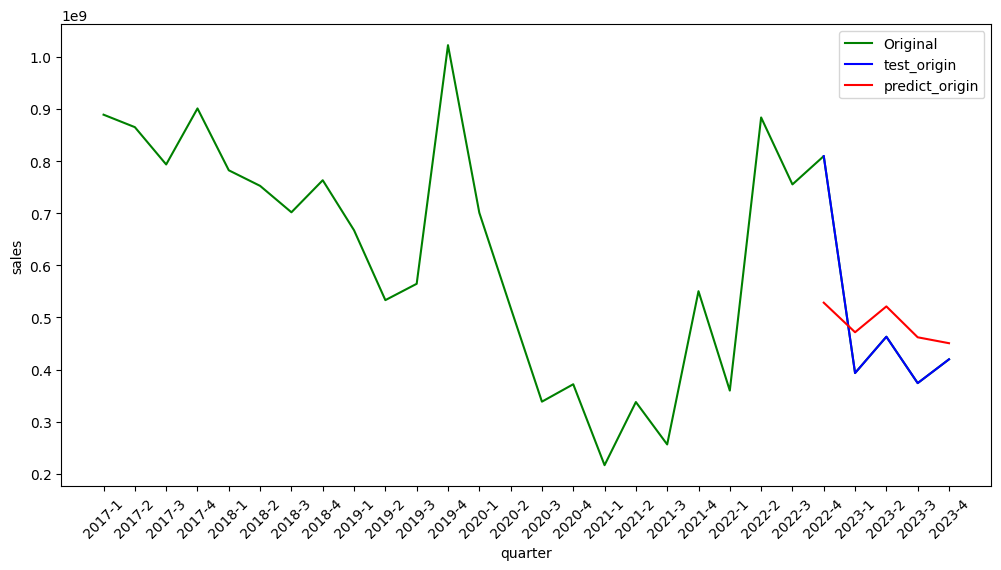

In [460]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_sing['분기'], sin_sing['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()